# <b>Film Data Analysis for Microsoft</b>
## Flatiron School Data Science Phase 1 Project

### Final Project Submision

**Student Name**: [Rafael V Rabinovich](mailto:rafvrab@gmail.com)<br>
**Student Pace**: Flex pace<br>
**Instructors**: Morgan Jones, Mark Barbour<br>
**Blog URL**: https://medium.com/@rafvrab

# Business Understanding

Microsoft's venture into the film-making industry has prompted a comprehensive analysis of provided datasets to deliver actionable recommendations. Commissioned by Microsoft, our task is to delve into the complexities of the movie industry. Specifically, our goal is to conduct data analysis aimed at uncovering the key factors driving successful box office performance. These insights will serve as a compass, guiding strategic decisions for Microsoft's upcoming movie studio.

The primary stakeholders vested in this analysis are the Board of Directors at Microsoft. Our findings will play a pivotal role in shaping their decision-making processes, aiding in the identification of lucrative film genres, potential directors, and critical success factors for maximizing movie performance.

Beyond the scope of analysis, this project holds immense significance by offering actionable insights that empower Microsoft to curate a portfolio of high-potential movies.

# Data Understanding

## Data Sources Overview:

The project utilizes the following data files:<br><br>

There are six data files provided:

|Data Source             | Data File             | Size (in bytes)|
|------------------------|----------------------|----------------|
|Box Office Mojo         | bom.movie_gross.csv.gz|	53,544|
|IMDB                    | im.db.zip            |	67,149,708|
|Rotten Tomatoes (movie info)  | rt.movie_info.tsv.gz |	498,202|
|Rotten Tomatoes (reviews)  | rt.reviews.tsv.gz    |	3,402,194|
|The Movie DB            | tmdb.movies.csv.gz   |	827,840|
|The Numbers             | tn.movie_budgets.csv.gz| 153,218|
|Total                   | 6 Files              |  72,084,706 bytes|

   - Box Office Mojo (bom.movie_gross.csv.gz)
   - IMDB (im.db.zip)
   - Rotten Tomatoes - movie information (rt.movie_info.tsv.gz)
   - Rotten Tomatoes - reviews (rt.reviews.tsv.gz)
   - The Movie DB (tmdb.movies.csv.gz)
   - The Numbers (tn.movie_budgets.csv.gz)


Detailed information:

Data File	|	Size (in bytes)	|	Shape	|	Columns	|	Data Frame ID
---------------|----------------|-----------|-----------|--------------------------------------
bom.movie_gross.csv.gz	|	53,544	|	3387, 5	|	title, studio, domestic_gross, foreign_gross, year	|	df_mg
im.db	|	169,443,328	|	8 tables	|	* see below	|	df_1
rt.movie_info.tsv	|	1,184,685	|	156, 12 	|	id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio	|	df_rt_mi
rt.reviews.tsv.gz	|	3,402,194	|	54432, 8 	|	id, review, rating, fresh, critic, top_critic, publisher, date	|	db_reviews
tmdb.movies.csv.gz	|	827,840	|	26517, 10 	|	Unnamed: 0, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count	|	db_movies
tn.movie_budgets.csv.gz	|	153,218	|	5782, 6 	|	id, release_date, movie, production_budget, domestic_gross, worldwide_gross	|	db_movie_budgets


IMDB table contents:

| Table ID | Name           | Shape        | Columns                                                                   | Data Frame ID |
|----------|----------------|--------------|---------------------------------------------------------------------------|---------------|
| 0        | movie_basics   | 146144, 6    | movie_id, primary_title, original_title, start_year, runtime_minutes, genres | df_mb         |
| 1        | directors      | 291174, 2    | movie_id, person_id                                                       | df_dir        |
| 2        | known_for      | 1638260, 2   | person_id, movie_id                                                       | df_kf         |
| 3        | movie_akas     | 331703, 8    | movie_id, ordering, title, region, language, types, attributes, is_original_title | df_akas   |
| 4        | movie_ratings  | 73856, 3     | movie_id, averagerating, numvotes                                          | df_ratings    |
| 5        | persons        | 606648, 5    | person_id, primary_name, birth_year, death_year, primary_profession        | df_persons    |
| 6        | principals     | 1028186, 6   | movie_id, ordering, person_id, category, job, characters                   | df_principals |
| 7        | writers        | 255873, 2    | movie_id, person_id                                                       | df_writers    |

The information shown above was obtained after opening files and exploring the data. The process follows below: 

## Opening and Reading Database Files

After importing the necessary Python libraries for the technical presentation, we will now delve into the databases. This initial exploratory step will shed light on the content of the given data. The conclusions of this section have already been presented above, in the tables at the beginning of the "data understanding" section.

As a first step, we use the "dir" command to list our data files and their size.

In [44]:
# Let's see that the data is there
! dir Data

 Volume in drive C is Acer
 Volume Serial Number is B208-A089

 Directory of C:\Users\rafvr\OneDrive\Documents\Flatiron\Phase1\MovieAnalysis\Data

01/03/2024  08:24 PM    <DIR>          .
01/10/2024  12:58 PM    <DIR>          ..
01/03/2024  01:35 PM            53,544 bom.movie_gross.csv.gz
01/10/2024  12:57 PM       169,443,328 im.db
01/03/2024  07:47 PM        67,149,708 im.db.zip
01/03/2024  07:48 PM           498,202 rt.movie_info.tsv.gz
01/03/2024  07:48 PM         3,402,194 rt.reviews.tsv.gz
01/03/2024  07:48 PM           827,840 tmdb.movies.csv.gz
01/03/2024  07:48 PM           153,218 tn.movie_budgets.csv.gz
               7 File(s)    241,528,034 bytes
               2 Dir(s)  866,056,609,792 bytes free


# Data Preparation

Notebook shows how and why you prepared your data, including:
- Instructions or code needed to get and prepare the raw data for analysis

- Valid justifications for why the steps you took are appropriate for the problem you are solving

In [45]:
# Bringing in the libraries I will use for this project
import pandas as pd           # Data manipulation
import numpy as np            # Numerical computations
import sqlite3                # Database operations
import zipfile                # Handling zip files
import gzip                   # Handling gzip files
import shutil  # For file copying during decompression
import random                 # Random number generation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns
import math
import calendar
%matplotlib inline
plt.style.use('ggplot')

Now we will unzip the data to make it accessible

In [46]:
# unzip the IMDB file
zip_path = 'Data/im.db.zip'  # Path to the ZIP file

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('Data')  # Extract to the 'Data' folder

In [47]:
# Proceed with the following files:

# Box Office Mojo
df_mg = pd.read_csv('Data/bom.movie_gross.csv.gz')

# Rotten Tomatoes movie info
file_path = 'Data/rt.movie_info.tsv.gz'
with gzip.open(file_path, 'rb') as f:
    file_content = f.read()
df_rt_mi = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')

# Rotten Tomatoes reviews
file_path = 'Data/rt.reviews.tsv.gz'
with gzip.open(file_path, 'rb') as f:
    file_content = f.read()
db_reviews = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')

# The Movie DB
file_path = 'Data/tmdb.movies.csv.gz'
db_movies = pd.read_csv(file_path, compression='gzip')

# The Numbers
file_path = 'Data/tn.movie_budgets.csv.gz'
db_movie_budgets = pd.read_csv(file_path, compression='gzip')


Since IMdB is an SQL collection of tables, we will open and explore the contents separatedly from the rest of the data

In [48]:
# Connecting to the IMDb Database
conn = sqlite3.connect('Data\im.db')  # connects to the file
cursor = conn.cursor() # places the cursor there

An SQL database file contains various tables of information. we want to reach into those tables, and then use Python to open and explore them.
Let's proceed to read the tables list.

In [49]:
db_path = 'Data/im.db'  # Path to the SQLite database file

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Retrieve the table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

# Close the cursor and connection
# cursor.close() # <--- we don't want this closed yet
# conn.close() # <--- we don't want this closed yet

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


There are 8 tables: movie_basics, directors, known_for, movie_akas, movie_ratings, persons, principals, and writers. Let's create dataframes with them.

In [50]:
# Reading data from SQL tables into Pandas DataFrames
movie_basics_df = pd.read_sql("""
SELECT *
FROM movie_basics
;""", conn)  # Data from 'movie_basics' table

directors_df = pd.read_sql("""
SELECT *
FROM directors
;""", conn)  # Data from 'directors' table

known_for_df = pd.read_sql("""
SELECT *
FROM known_for
;""", conn)  # Data from 'known_for' table

movie_akas_df = pd.read_sql("""
SELECT *
FROM movie_akas
;""", conn)  # Data from 'movie_akas' table

movie_ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings
;""", conn)  # Data from 'movie_ratings' table

persons_df = pd.read_sql("""
SELECT *
FROM persons
;""", conn)  # Data from 'persons' table

principals_df = pd.read_sql("""
SELECT *
FROM principals
;""", conn)  # Data from 'principals' table

writers_df = pd.read_sql("""
SELECT *
FROM writers
;""", conn)  # Data from 'writers' table

# conn.close() <-- we'll keep it open for now


Let's take a look at some statistics here:

In [51]:
from IPython.display import display, Markdown

# Define a function to display DataFrame description with a title
def display_with_title(df, title):
    display(Markdown(f"**{title} DataFrame:**"))
    display(df.describe())

# Call the display_with_title function for each DataFrame
display_with_title(movie_ratings_df, "Movie Ratings")
display_with_title(movie_basics_df, "Movie Basics")
display_with_title(movie_akas_df, "Movie AKAs")
display_with_title(persons_df, "Persons")
display_with_title(principals_df, "Principals")
display_with_title(directors_df, "Directors")
display_with_title(known_for_df, "Known For")
display_with_title(writers_df, "Writers")


**Movie Ratings DataFrame:**

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


**Movie Basics DataFrame:**

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


**Movie AKAs DataFrame:**

,ordering,is_original_title
count,331703.000000,331678.000000
mean,5.125872,0.134769
std,6.706664,0.341477
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


**Persons DataFrame:**

,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


**Principals DataFrame:**

,ordering
count,1.028186e+06
mean,4.739847e+00
std,2.747446e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,7.000000e+00
max,1.000000e+01


**Directors DataFrame:**

,movie_id,person_id
count,291174,291174
unique,140417,109253
top,tt4050462,nm6935209
freq,3818,238


**Known For DataFrame:**

,person_id,movie_id
count,1638260,1638260
unique,576444,514781
top,nm1202937,tt0806910
freq,6,633


**Writers DataFrame:**

,movie_id,person_id
count,255873,255873
unique,110261,122576
top,tt4050462,nm6935209
freq,3818,543


Easier to display in a single table:

| DF            | Movie Ratings | Movie Ratings | Movie Basics  | Movie Basics  | Movie AKAs   | Movie AKAs   | Persons      | Persons      | Principals   |
|---------------|---------------|---------------|---------------|---------------|--------------|--------------|--------------|--------------|--------------|
| Column        | averagerating | numvotes      | start_year    | runtime_minutes | ordering    | is_original_title | birth_year | death_year   | ordering    |
| count         | 73856.000000  | 7.385600e+04 | 146144.000000 | 114405.000000 | 331703.000000 | 331678.000000 | 82736.000000 | 6783.000000 | 1.028186e+06 |
| mean          | 6.332729      | 3.523662e+03 | 2014.621798   | 86.187247     | 5.125872     | 0.134769      | 1967.043826  | 2000.523367 | 4.739847e+00 |
| std           | 1.474978      | 3.029402e+04 | 2.733583      | 166.360590    | 6.706664     | 0.341477      | 22.122190    | 43.951530   | 2.747446e+00 |
| min           | 1.000000      | 5.000000e+00 | 2010.000000   | 1.000000      | 1.000000     | 0.000000      | 1.000000     | 17.000000   | 1.000000e+00 |
| 25%           | 5.500000      | 1.400000e+01 | 2012.000000   | 70.000000     | 1.000000     | 0.000000      | 1957.000000  | 2001.000000 | 2.000000e+00 |
| 50%           | 6.500000      | 4.900000e+01 | 2015.000000   | 87.000000     | 2.000000     | 0.000000      | 1971.000000  | 2013.000000 | 4.000000e+00 |
| 75%           | 7.400000      | 2.820000e+02 | 2017.000000   | 99.000000     | 6.000000     | 0.000000      | 1981.000000  | 2016.000000 | 7.000000e+00 |
| max           | 10.000000     | 1.841066e+06 | 2115.000000   | 51420.000000  | 61.000000    | 1.000000      | 2014.000000  | 2019.000000 | 1.000000e+01 |



| DF | Directors | Directors | Known For | Known For | Writers | Writers |
| --- | --- | --- | --- | --- | --- | --- |
| Column | movie_id | person_id | person_id | movie_id | movie_id | person_id |
| count | 291174 | 291174 | 1638260 | 1638260 | 255873 | 255873 |
| unique | 140417 | 109253 | 576444 | 514781 | 110261 | 122576 |
| top | tt4050462 | nm6935209 | nm1202937 | tt0806910 | tt4050462 | nm6935209 |
| freq | 3818 | 238 | 6 | 633 | 3818 | 543 |

This table provides a clear correspondence between the DataFrame variables (movie_basics_df, directors_df, known_for_df, etc.) and their respective tables in the dataset:

| DataFrame          | Contains Data File               |
|--------------------|---------------------------|
| movie_basics_df    | Movie Basics     |
| directors_df       | Directors        |
| known_for_df       | Known For        |
| movie_akas_df      | Movie AKAs       |
| movie_ratings_df   | Movie Ratings    |
| persons_df         | Persons          |
| principals_df      | Principals       |
| writers_df         | Writers          |

Let's now look at their shape, to see how many columns and lines does each table contain.

In [52]:
# For further exploration:

# assigning short df dataframes

sql = "SELECT * FROM movie_basics"
df_mb = pd.read_sql(sql, conn)

sql = "SELECT * FROM directors"
df_dir = pd.read_sql(sql, conn)

sql = "SELECT * FROM known_for"
df_kf = pd.read_sql(sql, conn)

sql = "SELECT * FROM movie_akas"
df_akas = pd.read_sql(sql, conn)

sql = "SELECT * FROM movie_ratings"
df_ratings = pd.read_sql(sql, conn)

sql = "SELECT * FROM persons"
df_persons = pd.read_sql(sql, conn)

sql = "SELECT * FROM principals"
df_principals = pd.read_sql(sql, conn)

sql = "SELECT * FROM writers"
df_writers = pd.read_sql(sql, conn)

In [53]:
# Define a dictionary to store the table names and their corresponding dataframes
tables = {
    'movie_basics': df_mb,
    'directors': df_dir,
    'known_for': df_kf,
    'movie_akas': df_akas,
    'movie_ratings': df_ratings,
    'persons': df_persons,
    'principals': df_principals,
    'writers': df_writers
}

# Iterate over the tables and print the table name and shape
for table_name, dataframe in tables.items():
    print(f"Table: {table_name}")
    print(f"Shape: {dataframe.shape}")
    print()

Table: movie_basics
Shape: (146144, 6)

Table: directors
Shape: (291174, 2)

Table: known_for
Shape: (1638260, 2)

Table: movie_akas
Shape: (331703, 8)

Table: movie_ratings
Shape: (73856, 3)

Table: persons
Shape: (606648, 5)

Table: principals
Shape: (1028186, 6)

Table: writers
Shape: (255873, 2)



Here is the information in tabular form:

| Table Name    | Rows       | Columns |
|---------------|------------|---------|
| movie_basics  | 146144     | 6       |
| directors     | 291174     | 2       |
| known_for     | 1638260    | 2       |
| movie_akas    | 331703     | 8       |
| movie_ratings | 73856      | 3       |
| persons       | 606648     | 5       |
| principals    | 1028186    | 6       |
| writers       | 255873     | 2       |

In this tabular version, the shape is divided into two columns, "Rows" and "Columns," providing a clearer breakdown of the dimensions for each table.

In [54]:
# Iterate over the tables and print the table name and head of each dataframe
for table_name, dataframe in tables.items():
    print(f"Table: {table_name}")
    print(dataframe.head())
    print()


Table: movie_basics
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  

Table: directors
    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540
4  tt0878654  nm0089502

Table: known_for
   pers

In [55]:
# Iterate over the tables and print the table name and column titles of each dataframe
for table_name, dataframe in tables.items():
    print(f"Table: {table_name}")
    print(f"Columns: {list(dataframe.columns)}")
    print()

Table: movie_basics
Columns: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']

Table: directors
Columns: ['movie_id', 'person_id']

Table: known_for
Columns: ['person_id', 'movie_id']

Table: movie_akas
Columns: ['movie_id', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']

Table: movie_ratings
Columns: ['movie_id', 'averagerating', 'numvotes']

Table: persons
Columns: ['person_id', 'primary_name', 'birth_year', 'death_year', 'primary_profession']

Table: principals
Columns: ['movie_id', 'ordering', 'person_id', 'category', 'job', 'characters']

Table: writers
Columns: ['movie_id', 'person_id']



Here's the arranged information in a tabular format:

| Table Name    | Column Titles                                                     |
|---------------|------------------------------------------------------------------|
| movie_basics  | movie_id, primary_title, original_title, start_year, runtime_minutes, genres |
| directors     | movie_id, person_id                                               |
| known_for     | person_id, movie_id                                               |
| movie_akas    | movie_id, ordering, title, region, language, types, attributes, is_original_title |
| movie_ratings | movie_id, averagerating, numvotes                                 |
| persons       | person_id, primary_name, birth_year, death_year, primary_profession |
| principals    | movie_id, ordering, person_id, category, job, characters          |
| writers       | movie_id, person_id                                               |


This table provides a clearer representation with each column title listed as a separate column, making it easier to compare the tables and their respective columns. Here "movie_id" and "person_id" listed in the first two columns, and other column titles shifted to the right. Thus we learn what the tables are comparing, and how to put them together if needed for further exploratory analysis.

| Table Name    | Column 1   | Column 2   | Column 3         | Column 4          | Column 5         | Column 6        | Column 7           | Column 8           |
|---------------|------------|------------|-----------------|------------------|------------------|-----------------|--------------------|--------------------|
| movie_basics  | movie_id   |            | primary_title    | original_title   | start_year       | runtime_minutes  | genres             |                    |
| directors     | movie_id   | person_id  |                 |                  |                  |                 |                    |                    |
| known_for     | movie_id  | person_id   |                 |                  |                  |                 |                    |                    |
| movie_akas    | movie_id   |            | ordering         | title            | region           | language        | types              | attributes         |
| movie_ratings | movie_id   |            | averagerating    | numvotes         |                  |                 |                    |                    |
| persons       |            | person_id  | primary_name     | birth_year       | death_year       | primary_profession |                    |                    |
| principals    | movie_id   | person_id   | ordering         | category         | job             | characters         |                    |                    |
| writers       | movie_id   | person_id  |                 |                  |                  |                 |                    |                    |


## Frame Mergers

We have frames with part of the information we need for comparative analisys, but we need to put together these pieces in order to have them in one place.  We will do a few mergers in order to unify out dfs. The table above will serve as a map for how this will be done.

In [56]:
# Merge 'directors' with 'known_for'
merged_directors_known_for = pd.merge(df_dir, df_kf, on='person_id', how='inner')

# Merge 'directors_known_for' with 'persons'
merged_directors_known_for_persons = pd.merge(merged_directors_known_for, df_persons, on='person_id', how='left')

# At this point we encountered a conflict with two "movie_id" columns
# Rename the 'movie_id' columns to resolve naming conflict
merged_directors_known_for_persons.rename(columns={'movie_id_x': 'movie_id'}, inplace=True)

# Merge 'movie_basics' with 'merged_directors_known_for_persons'
merged_movie_directors_known_for_persons = pd.merge(df_mb[['primary_title', 'runtime_minutes', 'genres', 'movie_id']], merged_directors_known_for_persons, on='movie_id', how='inner')

# Drop the 'movie_id_y' column
merged_movie_directors_known_for_persons.drop(columns=['movie_id_y'], inplace=True)

# Eliminate duplicates
merged_movie_directors_known_for_persons = merged_movie_directors_known_for_persons.drop_duplicates()

# Merge 'merged_movie_directors_known_for_persons' with 'movie_ratings'
merged_df = pd.merge(merged_movie_directors_known_for_persons, df_ratings, on='movie_id', how='inner')

# Merge 'merged_df' with 'principals'
merged_df = pd.merge(merged_df, df_principals[['movie_id', 'person_id', 'category']], on='movie_id', how='inner')

# Merge 'merged_df' with 'writers'
merged_df = pd.merge(merged_df, df_writers, on='movie_id', how='inner')

Having merged all those dataframes together, we can now see who directed and/or acted in which film, what genre is the film, what is the film rating, it's runtime, and number of votes. We can also see if the person related to the film is alive or deceased.
Let's take a look at our merged dataframe:

In [57]:
# Print the final merged DataFrame
merged_df

,primary_title,runtime_minutes,genres,movie_id,person_id_x,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes,person_id_y,category,person_id
0,Sunghursh,175.0,"Action,Crime,Drama",tt0063540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",7.0,77,nm0006210,composer,nm0023551
1,Sunghursh,175.0,"Action,Crime,Drama",tt0063540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",7.0,77,nm0006210,composer,nm1194313
2,Sunghursh,175.0,"Action,Crime,Drama",tt0063540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",7.0,77,nm0006210,composer,nm0347899
3,Sunghursh,175.0,"Action,Crime,Drama",tt0063540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",7.0,77,nm0006210,composer,nm1391276
4,Sunghursh,175.0,"Action,Crime,Drama",tt0063540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",7.0,77,nm0474801,actor,nm0023551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15257297,La vida sense la Sara Amat,NaN,None,tt9914942,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director",6.6,5,nm3678448,writer,nm9361716
15257298,La vida sense la Sara Amat,NaN,None,tt9914942,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director",6.6,5,nm9361716,writer,nm3678448
15257299,La vida sense la Sara Amat,NaN,None,tt9914942,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director",6.6,5,nm9361716,writer,nm9361716
15257300,La vida sense la Sara Amat,NaN,None,tt9914942,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director",6.6,5,nm1966322,cinematographer,nm3678448


## Data Cleaning

Having put that into a single frame is usefull, but there are obvious duplicates and missing vialues, as well as unnecessary columns. So let's proceed with cleaning our merged database:

In [58]:
# Drop 'person_id', 'person_id_x' and 'person_id_y' columns
merged_df.drop(columns=['person_id_x', 'person_id_y', 'person_id'], inplace=True)

In [59]:
# Drop 'category' column
merged_df.drop(columns=['category'], inplace=True)

In [60]:
# Eliminate duplicates
merged_df = merged_df.drop_duplicates()

Now let's take a look:

In [61]:
# Print the updated merged DataFrame
merged_df

,primary_title,runtime_minutes,genres,movie_id,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes
0,Sunghursh,175.0,"Action,Crime,Drama",tt0063540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",7.0,77
40,The Other Side of the Wind,122.0,Drama,tt0069049,Orson Welles,1915.0,1985.0,"actor,director,writer",6.9,4517
60,Sabse Bada Sukh,NaN,"Comedy,Drama",tt0069204,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer",6.1,13
70,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",tt0100275,Valeria Sarmiento,1948.0,NaN,"editor,director,writer",6.5,119
110,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",tt0100275,Raoul Ruiz,1941.0,2011.0,"director,writer,producer",6.5,119
...,...,...,...,...,...,...,...,...,...,...
15257225,Hayatta Olmaz,97.0,Comedy,tt9910502,Emre Çaltili,NaN,NaN,"actor,director,writer",7.0,9
15257234,Diabolik sono io,75.0,Documentary,tt9913084,Giancarlo Soldi,1954.0,NaN,"director,writer,producer",6.2,6
15257254,Sokagin Çocuklari,98.0,"Drama,Family",tt9914286,Ahmet Faik Akinci,NaN,NaN,"director,writer",8.7,136
15257272,Albatross,NaN,Documentary,tt9914642,Chris Jordan,NaN,NaN,"director,writer,editor",8.5,8


We will now clean any rows that do not provide information on runtime, genre, or birth year. Then we will erase from the database directors who have a death year - we will not make recommendations on directors that are no-longer alive.

In [62]:
# Drop rows with NaN values in 'runtime_minutes', 'genres', and 'birth_year'
filtered_merged_df = merged_df.dropna(subset=['runtime_minutes', 'genres', 'birth_year'])

# Filter rows where 'birth_year' has a value and 'death_year' is NaN
filtered_merged_df = filtered_merged_df.query("birth_year.notnull() and death_year.isnull()")

# Reset the index of the DataFrame
filtered_merged_df = filtered_merged_df.reset_index(drop=True)

# Print the modified DataFrame
filtered_merged_df

# Print the filtered DataFrame
filtered_merged_df

,primary_title,runtime_minutes,genres,movie_id,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes
0,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",tt0100275,Valeria Sarmiento,1948.0,NaN,"editor,director,writer",6.5,119
1,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",tt0137204,Anthony Harrison,1961.0,NaN,"actor,writer,producer",8.1,263
2,Pál Adrienn,136.0,Drama,tt0146592,Ágnes Kocsis,1971.0,NaN,"director,writer,producer",6.8,451
3,Children of the Green Dragon,89.0,Drama,tt0162942,Bence Miklauzic,1970.0,NaN,"director,writer,assistant_director",6.9,120
4,The Tragedy of Man,160.0,"Animation,Drama,History",tt0176694,Marcell Jankovics,1941.0,NaN,"writer,director,animation_department",7.8,584
...,...,...,...,...,...,...,...,...,...,...
20393,Dulce Familia,101.0,Comedy,tt9880982,Nicolás López,1983.0,NaN,"writer,producer,director",4.6,102
20394,Vosotros sois mi película,98.0,Documentary,tt9888844,Carlo Padial,1977.0,NaN,"writer,director,editor",3.9,253
20395,Killing Patient Zero,100.0,Documentary,tt9896252,Laurie Lynd,1959.0,NaN,"director,writer,producer",8.2,13
20396,Pengalila,111.0,Drama,tt9905462,T.V. Chandran,1950.0,NaN,"director,writer,actor",8.4,600


We have now a clean data frame that lists only living people. It contains information on the movies they made, the runtime length, the average votes and the number of votes - that measure popularity as well as the genre. All these information elements will be relevant to our analisys.

## Merger of Other Data Frames

In [63]:
# merge 'movie_basics' with 'movie_ratings'
# we're performing a "left" merger
df_im_mgd = pd.merge(df_mb, df_ratings, on='movie_id', how='left')

# Check for duplicates in the df_im_mgd DataFrame
duplicates = df_im_mgd[df_im_mgd.duplicated()]

# Check if there are any duplicates
if duplicates.shape[0] > 0:
    print("Duplicates found in df_im_mgd DataFrame.")
    print(duplicates)
else:
    print("No duplicates found in df_im_mgd DataFrame.")

No duplicates found in df_im_mgd DataFrame.


In [64]:
# Check if the data is clean (e.g., check for null values)
if df_im_mgd.isnull().values.any():
    print("The data contains null values.")
else:
    print("The data does not contain null values.")

The data contains null values.


In [65]:
# Check the number of rows and columns in the DataFrame
num_rows, num_columns = df_im_mgd.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 146144
Number of Columns: 8


In [66]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df_im_mgd.head()

First few rows of the DataFrame:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


Having put together the IMDb data from all the tables is now contained in a single dataframe, 'df_im_mgd', and the data is clean and relevant.

In [67]:
df_mg.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [68]:
df_rt_mi.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [69]:
db_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [70]:
db_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [71]:
db_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


These are the columns in each data frame:

| DataFrame         | Columns                                              |
|--------------------|------------------------------------------------------|
| df_mg              | title, studio, domestic_gross, foreign_gross, year    |
| df_rt_mi           | id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio |
| db_reviews         | id, review, rating, fresh, critic, top_critic, publisher, date |
| db_movies          | Unnamed: 0, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count |
| db_movie_budgets   | id, release_date, movie, production_budget, domestic_gross, worldwide_gross |


Of these, we're going to keep 'df_mg', 'db_movies', 'db_movie_budgets', and merge them into a single data frame. 
May be analize 'df_rt_mi' separatedly since it has genre informaiton, but lacks movie titles. 
Discard 'db_reviews' from further analisys, since it lacks title and genre informaiton.

In [72]:
# Merge df_mg with db_movies based on the 'title' column
unified_df = pd.merge(df_mg, db_movies, on='title', how='inner')

# Explanation of the code:
# pd.merge() function is used to merge DataFrames df_mg and db_movies
# 'on='title'' specifies the common column to merge on ('title' column)
# 'how='inner'' performs an inner join, keeping only matching rows from both DataFrames

Now we erase unnecessary columns

In [73]:
# List of columns to be eliminated
columns_to_drop = ['Unnamed: 0', 'id', 'original_language', 'original_title']

# Drop the specified columns from unified_df
unified_df = unified_df.drop(columns=columns_to_drop, errors='ignore')

# Display the cleaned DataFrame
unified_df.head()

,title,studio,domestic_gross,foreign_gross,year,genre_ids,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"[35, 12, 14, 16, 10751]",15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"[12, 14, 18, 10749]",20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,"[12, 28, 878]",28.515,2010-05-07,6.8,12368


In [74]:
# Merge unified_df with db_movie_budgets based on the 'title' and 'movie' columns
final_df = pd.merge(unified_df, db_movie_budgets, left_on='title', right_on='movie', how='inner')

# Drop the redundant 'movie' column after merging
final_df.drop('movie', axis=1, inplace=True)

# Drop the 'id' column from final_df
final_df.drop('id', axis=1, inplace=True)

# Display the final merged DataFrame
final_df

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",24.445,2010-06-17,7.7,8340,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",27.920,2010-07-16,8.3,22186,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"[35, 12, 14, 16, 10751]",15.041,2010-05-16,6.1,3843,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"[12, 14, 18, 10749]",20.340,2010-06-23,6.0,4909,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,"[12, 28, 878]",28.515,2010-05-07,6.8,12368,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,"[28, 12, 16]",2.707,2018-02-02,6.8,54,"Feb 2, 2018","$30,000,000","$490,973","$648,599"
1391,Mandy,RLJ,1200000.0,NaN,2018,[18],0.600,2016-01-24,3.5,2,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656"
1392,Mandy,RLJ,1200000.0,NaN,2018,"[28, 53, 27, 14, 9648]",16.240,2018-09-13,6.2,618,"Sep 14, 2018","$6,000,000","$1,214,525","$1,427,656"
1393,Lean on Pete,A24,1200000.0,NaN,2018,"[18, 12]",9.307,2018-04-06,6.9,133,"Apr 6, 2018","$8,000,000","$1,163,056","$2,455,027"


In [75]:
# Merge filtered_merged_df with final_df based on the 'primary_title' and 'title' columns
merged_final_df = pd.merge(filtered_merged_df, final_df, left_on='primary_title', right_on='title', how='inner')

# Display the merged DataFrame
merged_final_df

,primary_title,runtime_minutes,genres,movie_id,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes,...,year,genre_ids,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,On the Road,124.0,"Adventure,Drama,Romance",tt0337692,Walter Salles,1956.0,NaN,"director,producer,writer",6.1,37886,...,2012,"[12, 18]",8.919,2012-12-21,5.6,518,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
1,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",tt0359950,Ben Stiller,1965.0,NaN,"producer,actor,director",7.3,275300,...,2013,"[12, 35, 18, 14]",10.743,2013-12-25,7.1,4859,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"
2,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",tt0365907,Scott Frank,1960.0,NaN,"writer,producer,director",6.5,105116,...,2014,"[80, 18, 9648, 53]",19.373,2014-09-19,6.3,1685,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587"
3,Jurassic World,124.0,"Action,Adventure,Sci-Fi",tt0369610,Colin Trevorrow,1976.0,NaN,"writer,producer,director",7.0,539338,...,2015,"[28, 12, 878, 53]",20.709,2015-06-12,6.6,14056,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
4,The Rum Diary,119.0,"Comedy,Drama",tt0376136,Bruce Robinson,1946.0,NaN,"actor,writer,director",6.2,94787,...,2011,"[18, 35]",12.011,2011-10-27,5.7,652,"Oct 28, 2011","$45,000,000","$13,109,815","$21,544,732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,Unsane,98.0,"Drama,Horror,Mystery",tt7153766,Steven Soderbergh,1963.0,NaN,"producer,director,cinematographer",6.4,32049,...,2018,"[27, 53]",16.316,2018-03-23,6.2,667,"Mar 23, 2018","$1,500,000","$7,690,044","$14,244,931"
1275,Uncle Drew,103.0,"Comedy,Sport",tt7334528,Charles Stone III,1966.0,NaN,"director,actor",5.7,9739,...,2018,[35],10.836,2018-06-29,6.5,220,"Jun 29, 2018","$18,000,000","$42,469,946","$46,527,161"
1276,BlacKkKlansman,135.0,"Biography,Crime,Drama",tt7349662,Spike Lee,1957.0,NaN,"director,producer,writer",7.5,149005,...,2018,"[80, 18]",25.101,2018-07-30,7.6,3138,"Aug 10, 2018","$15,000,000","$49,275,340","$93,017,335"
1277,"Paul, Apostle of Christ",108.0,"Adventure,Biography,Drama",tt7388562,Andrew Hyatt,1982.0,NaN,"miscellaneous,director,writer",6.7,5662,...,2018,[36],12.005,2018-03-28,7.1,98,"Mar 23, 2018","$5,000,000","$17,547,999","$25,529,498"


We have made a general merger, which is rather a small part of the original data, with only 1279 rows. SInce this is very limited, we will use our two previous mergers, 'filtered_merged_df' from the IMDb tables and 'unified_df' from the selected data frame files.  We will also use those earlier mergers wich are more rich in data. 

## Data Preparation for merged_final_df

In [76]:
# Convert columns to numeric values (remove commas and dollar signs)
merged_final_df['worldwide_gross'] = merged_final_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
merged_final_df['production_budget'] = merged_final_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)

In [77]:
# Define the desired column order
desired_columns = ['primary_title', 'domestic_gross_y', 'domestic_gross_x', 'foreign_gross', 'worldwide_gross', 'production_budget']

# Get a list of current columns excluding the desired ones
other_columns = [col for col in merged_final_df.columns if col not in desired_columns]

# Reorder the columns as per the desired order
reordered_columns = desired_columns + other_columns

# Reindex the DataFrame columns
merged_final_df = merged_final_df.reindex(columns=reordered_columns)

A bit more cleaning...

In [78]:
# Drop the 'genre_ids' column
merged_final_df.drop(columns='genre_ids', inplace=True)

# Drop the 'domestic_gross_y' column
merged_final_df.drop(columns='domestic_gross_y', inplace=True)

# Rename 'domestic_gross_x' to 'domestic_gross'
merged_final_df.rename(columns={'domestic_gross_x': 'domestic_gross'}, inplace=True)

# Convert 'foreign_gross' to float64
merged_final_df['foreign_gross'] = merged_final_df['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)

In [79]:
# Displaying the data types of specific columns
selected_columns = ['domestic_gross', 'foreign_gross', 'worldwide_gross', 'production_budget']
column_types = merged_final_df[selected_columns].dtypes
print(column_types)

domestic_gross       float64
foreign_gross        float64
worldwide_gross      float64
production_budget    float64
dtype: object


In [80]:
# now let's take a look
merged_final_df.head()

,primary_title,domestic_gross,foreign_gross,worldwide_gross,production_budget,runtime_minutes,genres,movie_id,primary_name,birth_year,...,averagerating,numvotes,title,studio,year,popularity,release_date_x,vote_average,vote_count,release_date_y
0,On the Road,744000.0,8000000.0,9.313302e+06,25000000.0,124.0,"Adventure,Drama,Romance",tt0337692,Walter Salles,1956.0,...,6.1,37886,On the Road,IFC,2012,8.919,2012-12-21,5.6,518,"Mar 22, 2013"
1,The Secret Life of Walter Mitty,58200000.0,129900000.0,1.878612e+08,91000000.0,114.0,"Adventure,Comedy,Drama",tt0359950,Ben Stiller,1965.0,...,7.3,275300,The Secret Life of Walter Mitty,Fox,2013,10.743,2013-12-25,7.1,4859,"Dec 25, 2013"
2,A Walk Among the Tombstones,26300000.0,26900000.0,6.210859e+07,28000000.0,114.0,"Action,Crime,Drama",tt0365907,Scott Frank,1960.0,...,6.5,105116,A Walk Among the Tombstones,Uni.,2014,19.373,2014-09-19,6.3,1685,"Sep 19, 2014"
3,Jurassic World,652300000.0,1019.4,1.648855e+09,215000000.0,124.0,"Action,Adventure,Sci-Fi",tt0369610,Colin Trevorrow,1976.0,...,7.0,539338,Jurassic World,Uni.,2015,20.709,2015-06-12,6.6,14056,"Jun 12, 2015"
4,The Rum Diary,13100000.0,10800000.0,2.154473e+07,45000000.0,119.0,"Comedy,Drama",tt0376136,Bruce Robinson,1946.0,...,6.2,94787,The Rum Diary,FD,2011,12.011,2011-10-27,5.7,652,"Oct 28, 2011"


# Exploratory Data Analysis

Notebook promotes three recommendations for choosing films to produce:
 - Uses three or more findings from data analyses to support recommendations
 - Explains why the findings support the recommendations
 - Explains how the recommendations would help the new movie studio succeed

Let's calculate ROI and net profit with these formulas [(Source)](https://mailchimp.com/marketing-glossary/roi/):

Net Profit = Gross Revenue - Budget<br>
ROI = (Net Profit / Budget) * 100 

In [81]:
# Calculate Profit and ROI using correct formulas
merged_final_df['profit'] = merged_final_df['worldwide_gross'] - merged_final_df['production_budget']
merged_final_df['roi'] = (merged_final_df['profit'] / merged_final_df['production_budget']) * 100

In [82]:
# Define the desired column order
desired_columns = ['primary_title', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'production_budget', 'profit', 'roi']

# Get a list of current columns excluding the desired ones
other_columns = [col for col in merged_final_df.columns if col not in desired_columns]

# Reorder the columns as per the desired order
reordered_columns = desired_columns + other_columns

# Reindex the DataFrame columns
merged_final_df = merged_final_df.reindex(columns=reordered_columns)
merged_final_df.head()

,primary_title,domestic_gross,foreign_gross,worldwide_gross,production_budget,profit,roi,runtime_minutes,genres,movie_id,...,averagerating,numvotes,title,studio,year,popularity,release_date_x,vote_average,vote_count,release_date_y
0,On the Road,744000.0,8000000.0,9.313302e+06,25000000.0,-1.568670e+07,-62.746792,124.0,"Adventure,Drama,Romance",tt0337692,...,6.1,37886,On the Road,IFC,2012,8.919,2012-12-21,5.6,518,"Mar 22, 2013"
1,The Secret Life of Walter Mitty,58200000.0,129900000.0,1.878612e+08,91000000.0,9.686118e+07,106.440860,114.0,"Adventure,Comedy,Drama",tt0359950,...,7.3,275300,The Secret Life of Walter Mitty,Fox,2013,10.743,2013-12-25,7.1,4859,"Dec 25, 2013"
2,A Walk Among the Tombstones,26300000.0,26900000.0,6.210859e+07,28000000.0,3.410859e+07,121.816382,114.0,"Action,Crime,Drama",tt0365907,...,6.5,105116,A Walk Among the Tombstones,Uni.,2014,19.373,2014-09-19,6.3,1685,"Sep 19, 2014"
3,Jurassic World,652300000.0,1019.4,1.648855e+09,215000000.0,1.433855e+09,666.909239,124.0,"Action,Adventure,Sci-Fi",tt0369610,...,7.0,539338,Jurassic World,Uni.,2015,20.709,2015-06-12,6.6,14056,"Jun 12, 2015"
4,The Rum Diary,13100000.0,10800000.0,2.154473e+07,45000000.0,-2.345527e+07,-52.122818,119.0,"Comedy,Drama",tt0376136,...,6.2,94787,The Rum Diary,FD,2011,12.011,2011-10-27,5.7,652,"Oct 28, 2011"


Let's explore our data.

C:\Users\rafvr\AppData\Local\Temp\ipykernel_22344\1567199818.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genres', y='popularity', data=merged_final_df, ci=None)


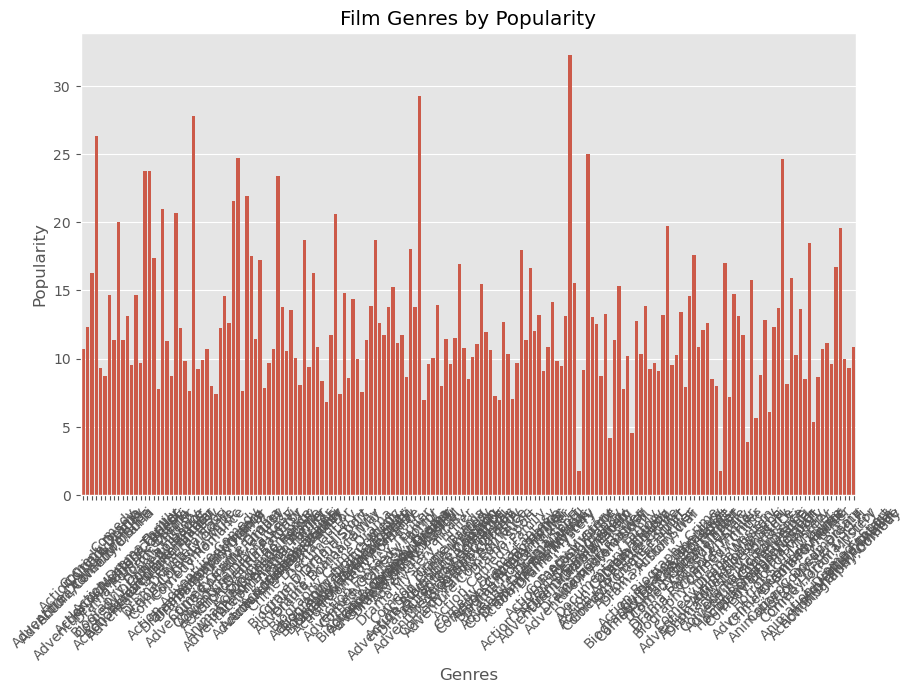

In [83]:
# Assuming 'genre' and 'popularity' columns exist in merged_final_df
plt.figure(figsize=(10, 6))
sns.barplot(x='genres', y='popularity', data=merged_final_df, ci=None)
plt.title('Film Genres by Popularity')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

Reducing the set to the top 25 most popular films genres.

C:\Users\rafvr\AppData\Local\Temp\ipykernel_22344\1499904627.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_genres.values, y=top_25_genres.index, palette='viridis')


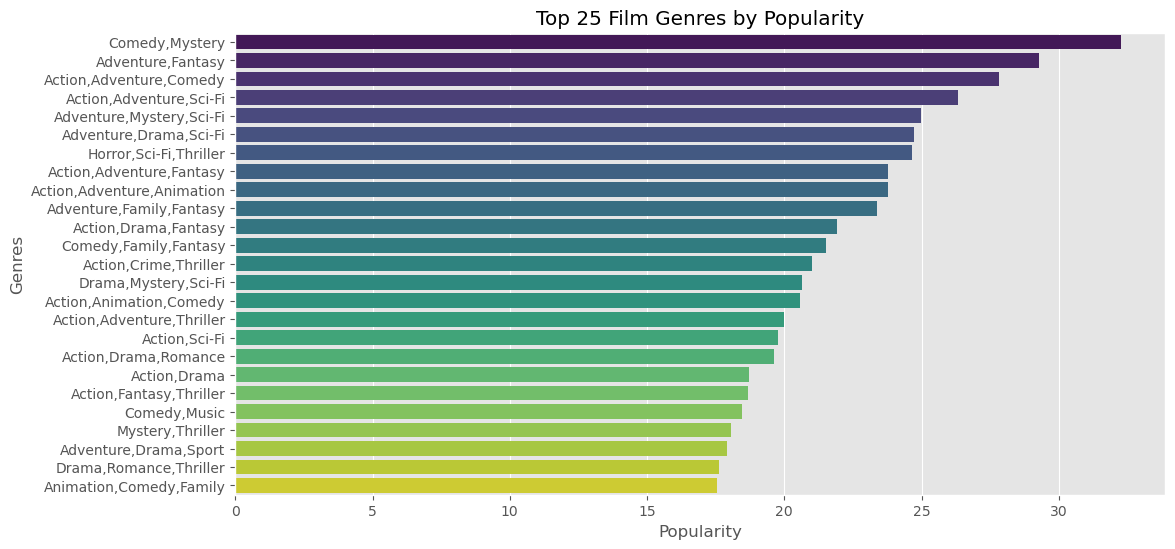

In [84]:
# Assuming 'genres' and 'popularity' columns exist in merged_final_df
top_25_genres = merged_final_df.groupby('genres')['popularity'].mean().nlargest(25).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_25_genres.values, y=top_25_genres.index, palette='viridis')
plt.title('Top 25 Film Genres by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Genres')
plt.show()


The top 25 best ROI films. 

C:\Users\rafvr\AppData\Local\Temp\ipykernel_22344\1330475812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_genres_roi.values, y=top_25_genres_roi.index, palette='muted')


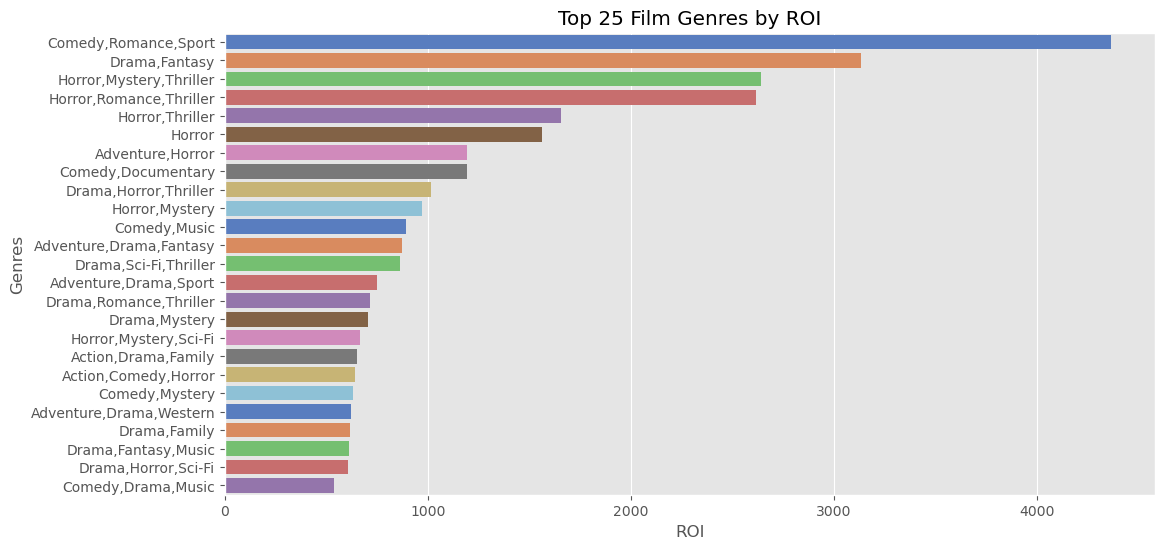

In [86]:
# Bar plot to display the top 25 film genres by their mean Return on Investment (ROI) 
top_25_genres_roi = merged_final_df.groupby('genres')['roi'].mean().nlargest(25).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_25_genres_roi.values, y=top_25_genres_roi.index, palette='muted')
plt.title('Top 25 Film Genres by ROI')
plt.xlabel('ROI')
plt.ylabel('Genres')
plt.show()

General data visualization explorations:

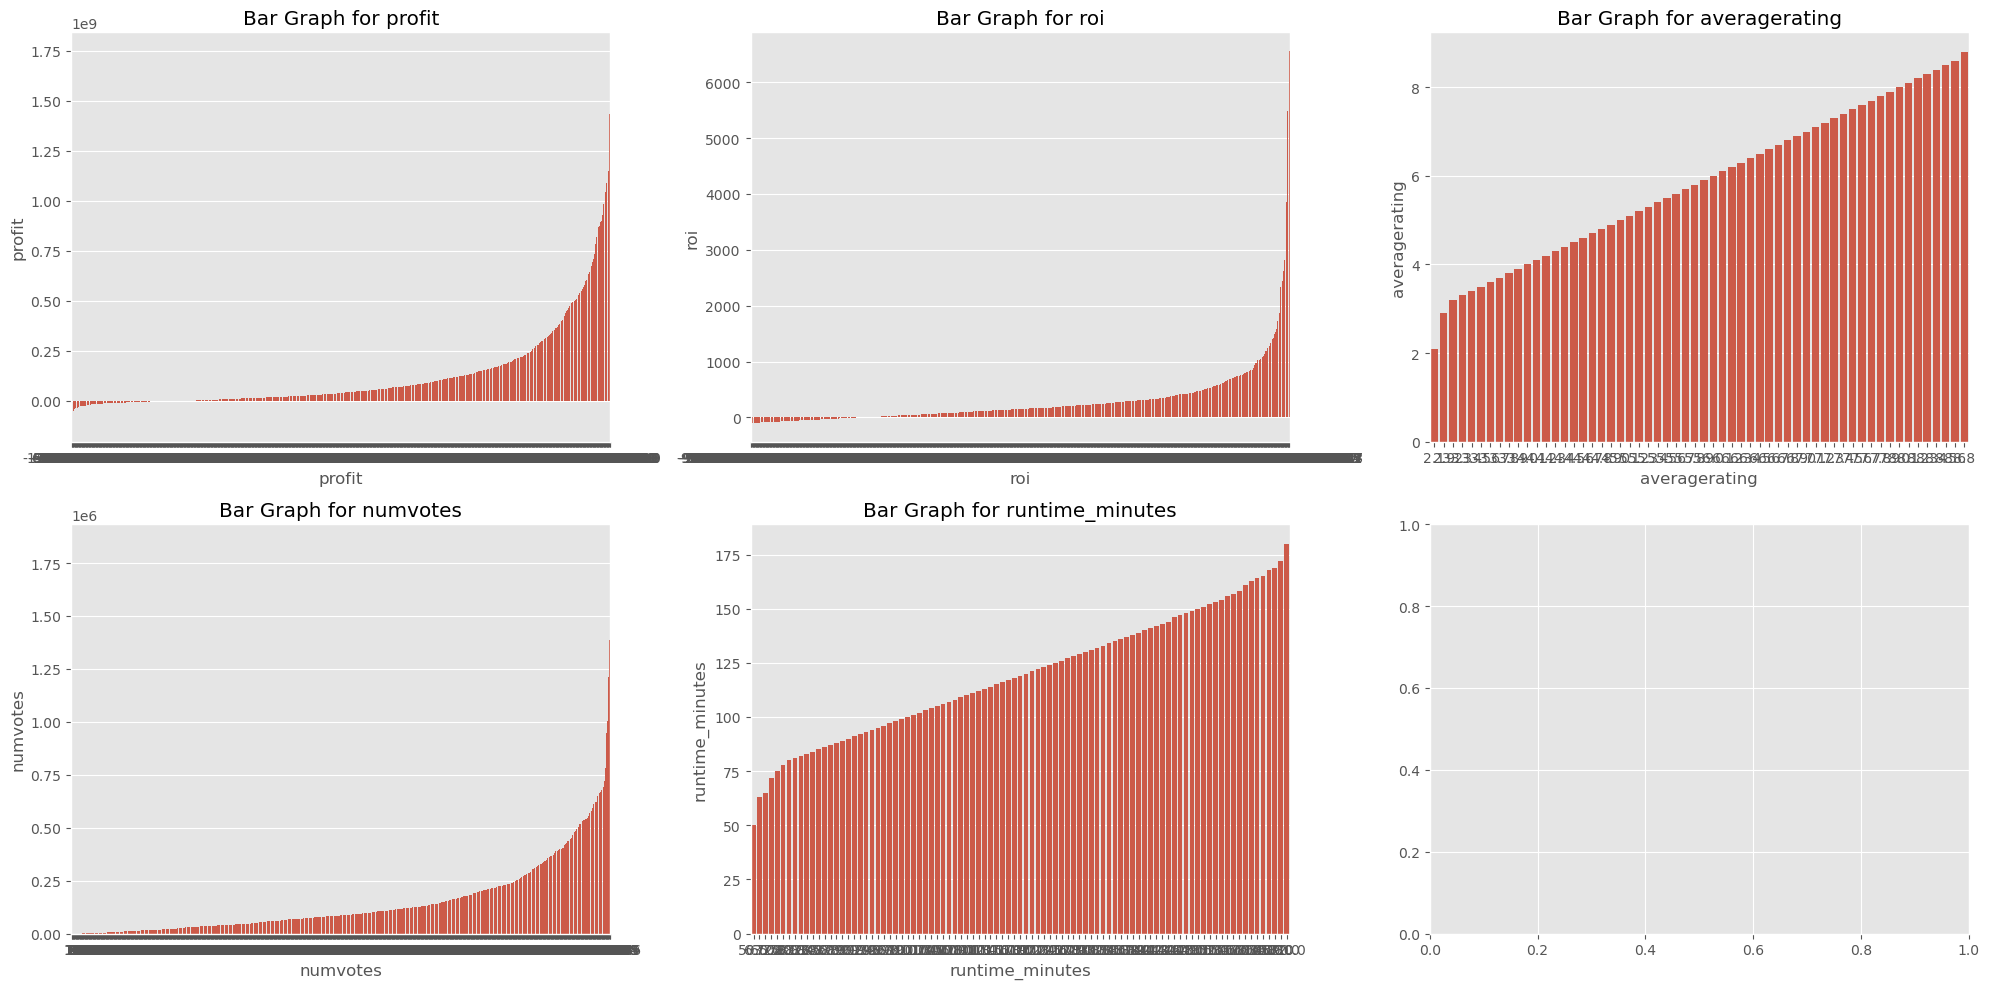

In [87]:
# Define columns for different plots
bar_columns = ['profit', 'roi', 'averagerating', 'numvotes', 'runtime_minutes']

# Calculate the total number of plots
total_plots = len(bar_columns)
rows = 2  # Set the number of rows to 2 for two rows

# Create a subplot grid
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(20, 5 * rows))

# Loop through the columns and create respective plots
for i, col in enumerate(bar_columns):
    sns.barplot(x=col, y=col, data=merged_final_df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Bar Graph for {col}')

# Adjust layout
plt.tight_layout()
plt.show()

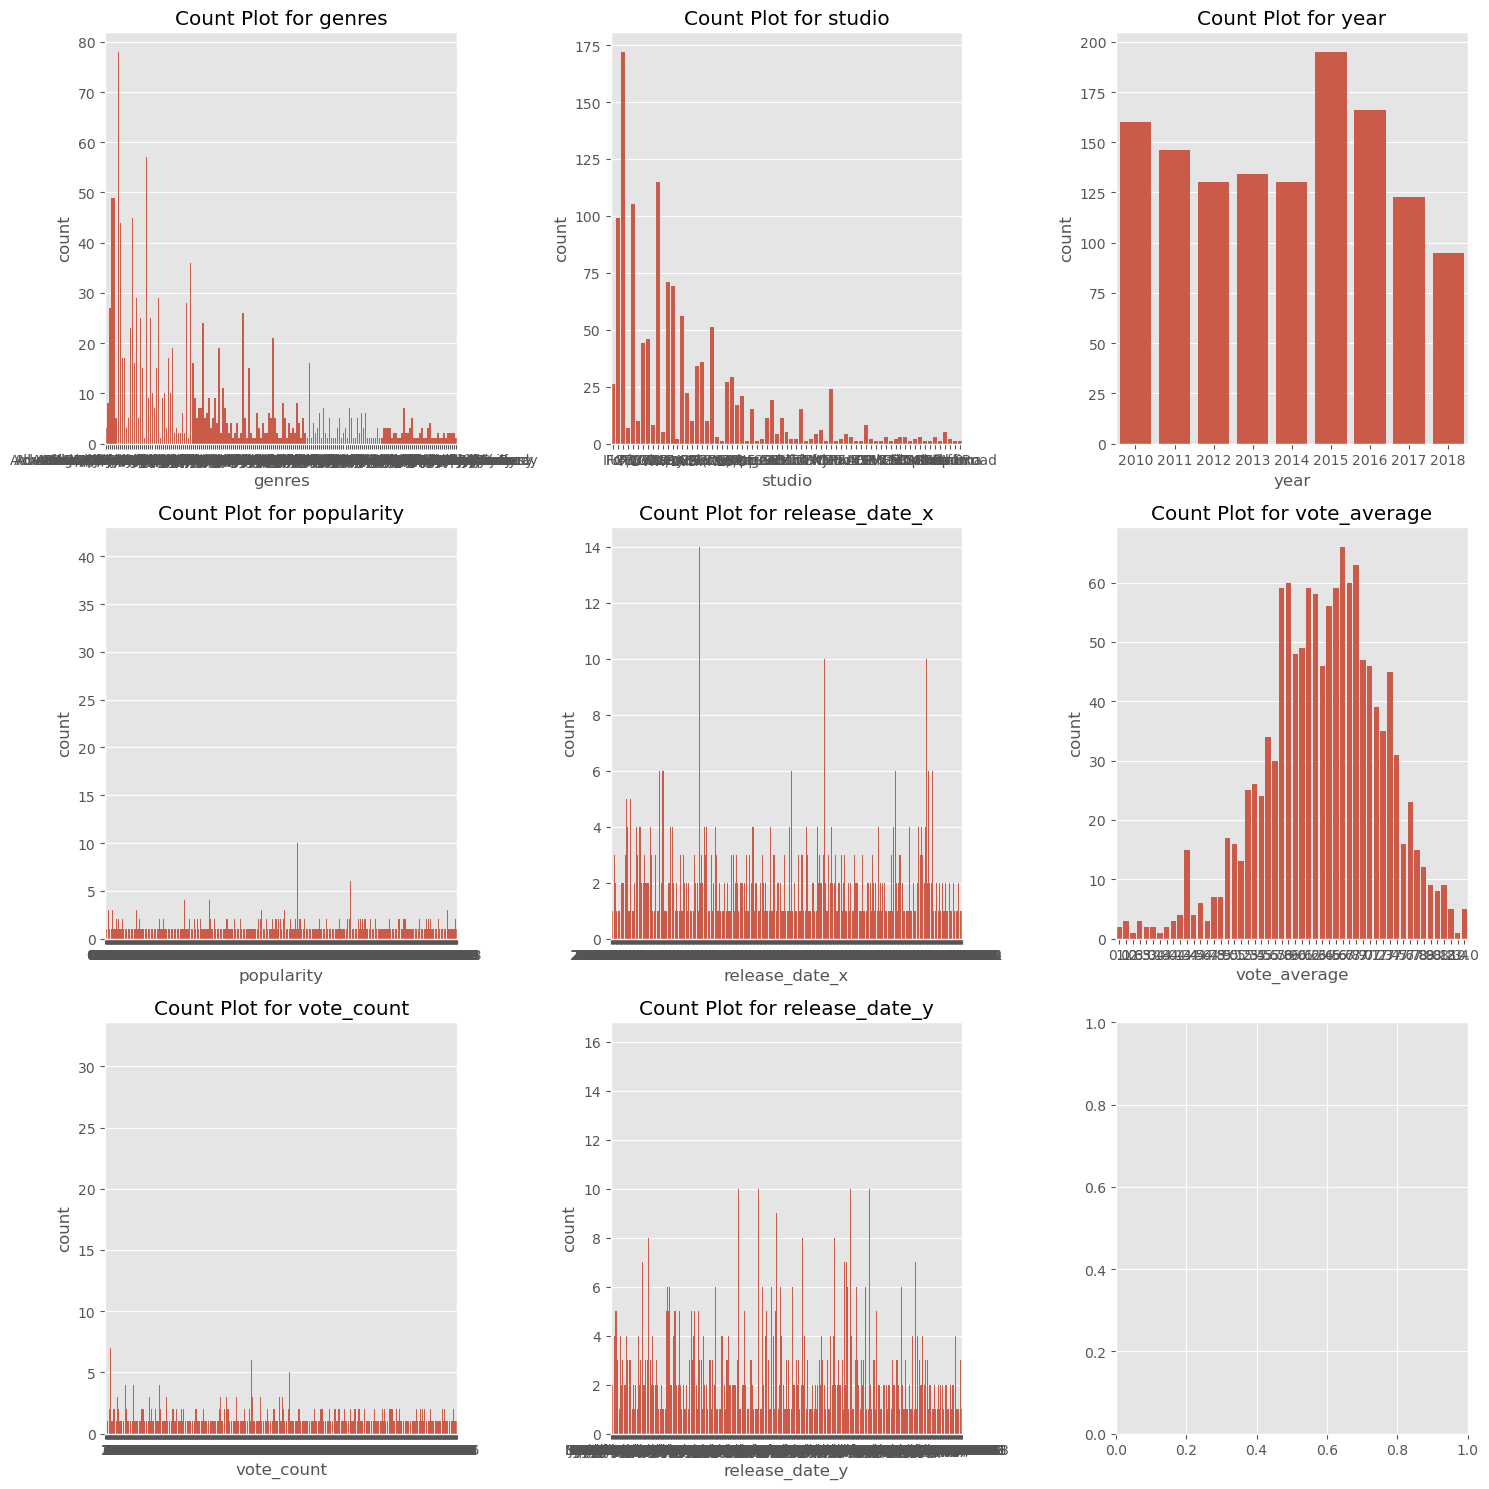

In [88]:
# List of columns to plot
columns_to_plot = ['genres', 'studio', 'year', 'popularity', 'release_date_x', 'vote_average', 'vote_count', 'release_date_y']

# Calculate the number of rows needed for subplots
num_rows = (len(columns_to_plot) - 1) // 3 + 1

# Create subplots with proper size
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Loop through columns and plot
for i, col in enumerate(columns_to_plot):
    row = i // 3
    col_index = i % 3
    sns.countplot(x=merged_final_df[col], data=merged_final_df, ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Count Plot for {col}')

plt.tight_layout()
plt.show()

At this point we would like to visualize budget and consider dividing production costs in budget brackets. This should be useful for stakeholders when deciding how much to invest and posible outcome of investment within such and such limits.

C:\Users\rafvr\AppData\Local\Temp\ipykernel_22344\2950482186.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='production_budget', y='genres', data=merged_final_df, order=genre_order, palette='viridis')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


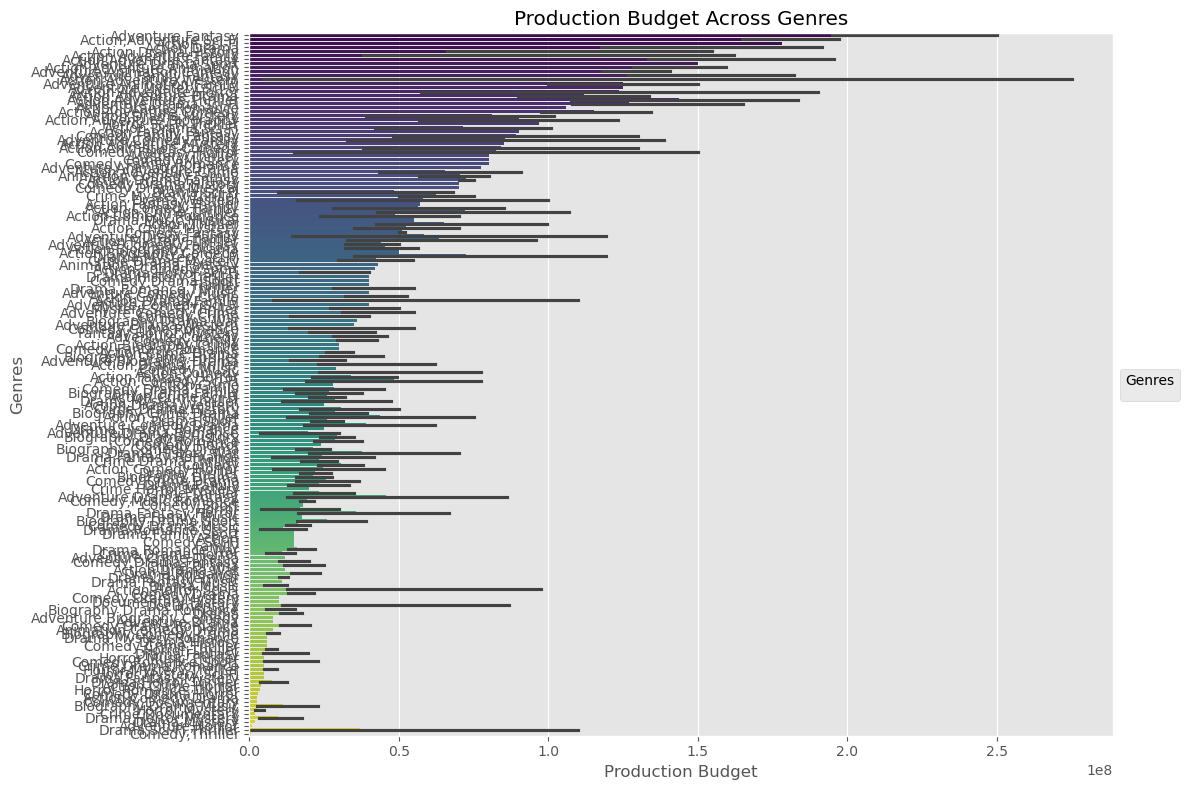

In [89]:
# Calculate median production budget for each genre and sort the genres accordingly
genre_order = merged_final_df.groupby('genres')['production_budget'].median().sort_values(ascending=False).index

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot for 'genres' vs 'production_budget' with distinct colors for each genre
sns.barplot(x='production_budget', y='genres', data=merged_final_df, order=genre_order, palette='viridis')
plt.title('Production Budget Across Genres')
plt.xlabel('Production Budget')
plt.ylabel('Genres')

# Show legend
plt.legend(title='Genres', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Production Budget Analysis and Categorization

Since we were requested three recommendations, we will strategize production budget in three sections: lower, middle and higher budget brackets.  

C:\Users\rafvr\AppData\Local\Temp\ipykernel_22344\203977153.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=budget_labels, y=median_values, palette='viridis')


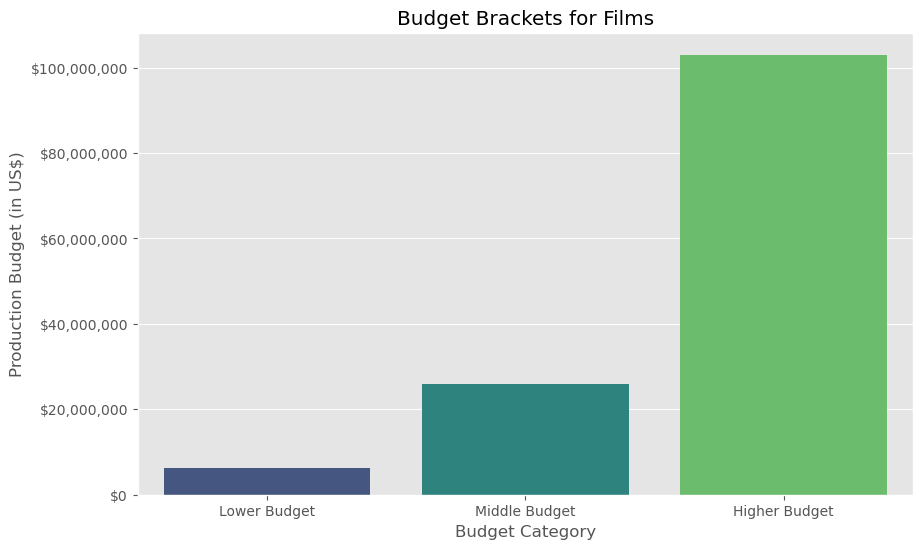

In [90]:
import matplotlib.ticker as ticker

# Calculate quartiles for 'production_budget'
lower_quartile = merged_final_df['production_budget'].quantile(1/3)
upper_quartile = merged_final_df['production_budget'].quantile(2/3)

# Define labels and ranges for the three budget categories
budget_labels = ['Lower Budget', 'Middle Budget', 'Higher Budget']
budget_ranges = [
    (merged_final_df['production_budget'].min(), lower_quartile),
    (lower_quartile, upper_quartile),
    (upper_quartile, merged_final_df['production_budget'].max())
]

# Calculate median values for each budget category
median_values = [merged_final_df[(merged_final_df['production_budget'] >= lower) & (merged_final_df['production_budget'] < upper)]['production_budget'].median() 
                 for lower, upper in budget_ranges]

# Create a bar plot showing the budget ranges for each category
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=budget_labels, y=median_values, palette='viridis')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))
plt.title('Budget Brackets for Films')
plt.xlabel('Budget Category')
plt.ylabel('Production Budget (in US$)')
plt.show()


In [91]:
# Define the quartiles for 'production_budget'
lower_quartile = merged_final_df['production_budget'].quantile(1/3)
upper_quartile = merged_final_df['production_budget'].quantile(2/3)

# Count the number of films and unique genres in each budget bracket
lower_budget_films = merged_final_df[merged_final_df['production_budget'] < lower_quartile]
middle_budget_films = merged_final_df[(merged_final_df['production_budget'] >= lower_quartile) & (merged_final_df['production_budget'] < upper_quartile)]
higher_budget_films = merged_final_df[merged_final_df['production_budget'] >= upper_quartile]

# Create the table data
brackets = ['Lower Budget', 'Middle Budget', 'Higher Budget']
min_amounts = ['$0', f'${lower_quartile:,.0f}', f'${upper_quartile:,.0f}']
max_amounts = [f'${lower_quartile:,.0f}', f'${upper_quartile:,.0f}', 'More']
film_counts = [len(lower_budget_films), len(middle_budget_films), len(higher_budget_films)]

# Print the tabular result
print("Budget Brackets: | Min. Amount(US$) | Max. Amount(US$) | Number of Films:")
print("-----------------|------------------|------------------|-----------------")
for i in range(3):
    print(f"{brackets[i]:<16} | {min_amounts[i]:<18} | {max_amounts[i]:<16} | {film_counts[i]}")


Budget Brackets: | Min. Amount(US$) | Max. Amount(US$) | Number of Films:
-----------------|------------------|------------------|-----------------
Lower Budget     | $0                 | $15,000,000      | 398
Middle Budget    | $15,000,000        | $50,000,000      | 437
Higher Budget    | $50,000,000        | More             | 444


In [92]:
print(merged_final_df.columns)

Index(['primary_title', 'domestic_gross', 'foreign_gross', 'worldwide_gross',
       'production_budget', 'profit', 'roi', 'runtime_minutes', 'genres',
       'movie_id', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'averagerating', 'numvotes', 'title', 'studio',
       'year', 'popularity', 'release_date_x', 'vote_average', 'vote_count',
       'release_date_y'],
      dtype='object')


## Genre Analysis

Having divided the Production Budget per film in three sections, let us now find out the best ROI per film and the genre, for each budget bracket. We will pull the best three films in each category.

In [93]:
# Define the quartiles for 'production_budget'
lower_quartile = merged_final_df['production_budget'].quantile(1/3)
upper_quartile = merged_final_df['production_budget'].quantile(2/3)

# Define the budget categories
merged_final_df['budget_category'] = pd.cut(merged_final_df['production_budget'],
                                           bins=[-np.inf, lower_quartile, upper_quartile, np.inf],
                                           labels=['Lower Budget', 'Middle Budget', 'Higher Budget'])

# Sort films by ROI within each budget category and get the genres
top_genres_lower = (merged_final_df[merged_final_df['budget_category'] == 'Lower Budget']
                    .groupby('genres')['roi'].mean()
                    .nlargest(3)
                    .reset_index())
top_genres_middle = (merged_final_df[merged_final_df['budget_category'] == 'Middle Budget']
                     .groupby('genres')['roi'].mean()
                     .nlargest(3)
                     .reset_index())
top_genres_higher = (merged_final_df[merged_final_df['budget_category'] == 'Higher Budget']
                     .groupby('genres')['roi'].mean()
                     .nlargest(3)
                     .reset_index())

# Display the results
print("Top 3 genres with the best ROI in the Lower Budget:")
print(top_genres_lower)

print("\nTop 3 genres with the best ROI in the Middle Budget:")
print(top_genres_middle)

print("\nTop 3 genres with the best ROI in the Higher Budget:")
print(top_genres_higher)


Top 3 genres with the best ROI in the Lower Budget:
                 genres          roi
0  Comedy,Romance,Sport  5479.296120
1         Drama,Fantasy  4384.589026
2                Horror  2987.584937

Top 3 genres with the best ROI in the Middle Budget:
                    genres          roi
0  Horror,Mystery,Thriller  1490.000705
1   Action,Sci-Fi,Thriller  1043.769440
2           Comedy,Fantasy  1012.033254

Top 3 genres with the best ROI in the Higher Budget:
                   genres          roi
0   Biography,Drama,Music  1527.246076
1  Action,Biography,Drama   843.666159
2   Adventure,Drama,Sport   748.313273


## Seasonal Analysis

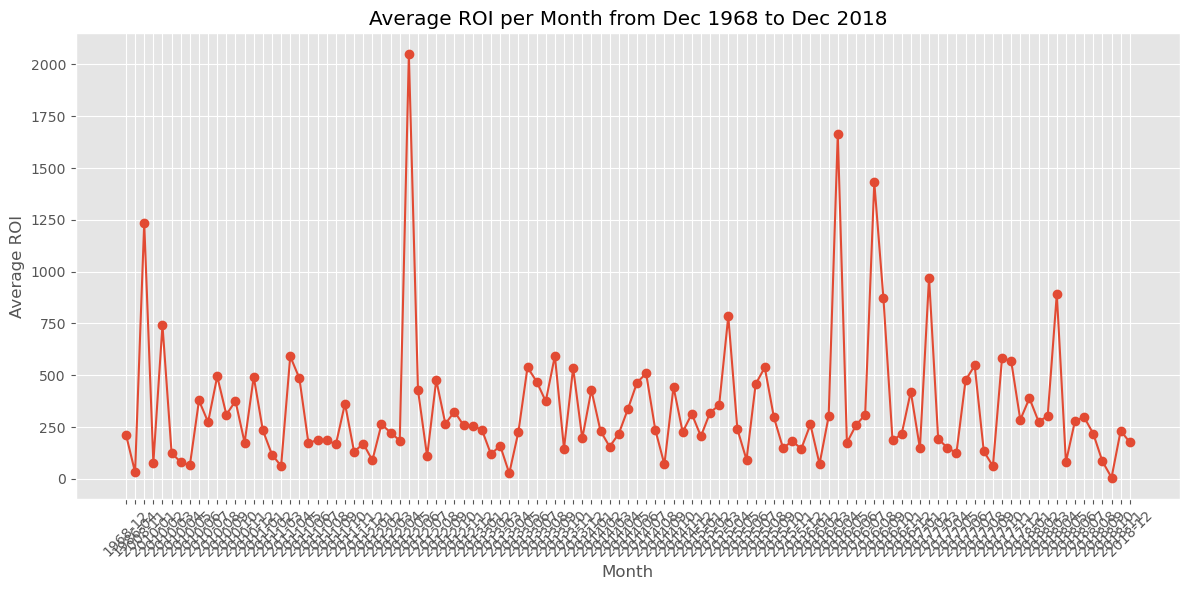

In [100]:
# Ensure 'release_date_x' column is in datetime format
merged_final_df['release_date_x'] = pd.to_datetime(merged_final_df['release_date_x'])

# Extract month and year information
merged_final_df['release_month'] = merged_final_df['release_date_x'].dt.month.astype(int)
merged_final_df['release_year'] = merged_final_df['release_date_x'].dt.year.astype(int)

# Group by month and year, calculate average ROI
average_monthly_roi = merged_final_df.groupby(['release_year', 'release_month'])['roi'].mean().reset_index()

# Visualization: Plotting average ROI against month
plt.figure(figsize=(12, 6))
plt.plot(average_monthly_roi.index, average_monthly_roi['roi'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.title(f'Average ROI per Month from {merged_final_df["release_date_x"].min().strftime("%b %Y")} to {merged_final_df["release_date_x"].max().strftime("%b %Y")}')

# Add month-year labels to the x-axis
plt.xticks(ticks=average_monthly_roi.index, labels=average_monthly_roi['release_year'].astype(str) + '-' + average_monthly_roi['release_month'].astype(str).str.zfill(2), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


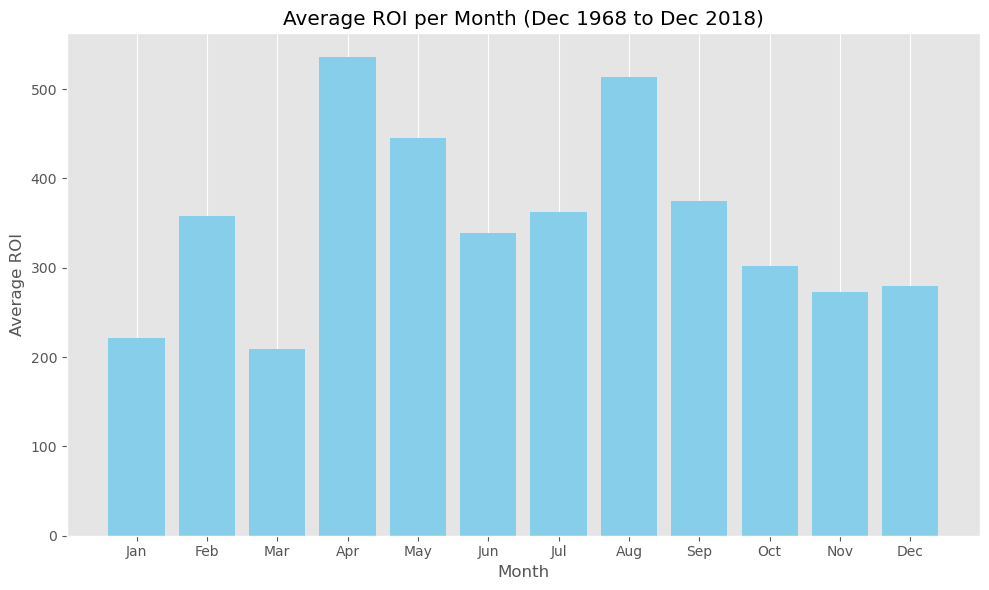

In [101]:
# Extract month and year information
merged_final_df['release_month'] = merged_final_df['release_date_x'].dt.month.astype(int)
merged_final_df['release_year'] = merged_final_df['release_date_x'].dt.year.astype(int)

# Group by month and year, calculate average ROI
average_monthly_roi = merged_final_df.groupby(['release_month'])['roi'].mean().reset_index()

# Visualization: Plotting average ROI against month
plt.figure(figsize=(10, 6))
plt.bar(average_monthly_roi['release_month'], average_monthly_roi['roi'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.title('Average ROI per Month (Dec 1968 to Dec 2018)')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [102]:
# Group by month and year, calculate average ROI
average_monthly_roi = merged_final_df.groupby(['release_year', 'release_month', 'budget_category'])['roi'].mean().reset_index()

# Map month numbers to their names
average_monthly_roi['release_month_name'] = average_monthly_roi['release_month'].apply(lambda x: calendar.month_name[x])

# Find the top 3 months with the best average monthly ROI for each budget bracket
top_months_lower = (average_monthly_roi[average_monthly_roi['budget_category'] == 'Lower Budget']
                    .groupby('release_month_name')['roi'].mean()
                    .nlargest(3)
                    .reset_index())
top_months_middle = (average_monthly_roi[average_monthly_roi['budget_category'] == 'Middle Budget']
                     .groupby('release_month_name')['roi'].mean()
                     .nlargest(3)
                     .reset_index())
top_months_higher = (average_monthly_roi[average_monthly_roi['budget_category'] == 'Higher Budget']
                     .groupby('release_month_name')['roi'].mean()
                     .nlargest(3)
                     .reset_index())

# Display the results
print("Top 3 performing months in terms of average monthly ROI for Lower Budget:")
print(top_months_lower)

print("\nTop 3 performing months in terms of average monthly ROI for Middle Budget:")
print(top_months_middle)

print("\nTop 3 performing months in terms of average monthly ROI for Higher Budget:")
print(top_months_higher)


Top 3 performing months in terms of average monthly ROI for Lower Budget:
  release_month_name          roi
0           February  1286.732885
1             August  1268.604293
2                May   968.837083

Top 3 performing months in terms of average monthly ROI for Middle Budget:
  release_month_name         roi
0               July  322.130888
1           November  244.326009
2            January  231.572260

Top 3 performing months in terms of average monthly ROI for Higher Budget:
  release_month_name         roi
0              April  365.744233
1               June  361.425554
2               July  292.476411


C:\Users\rafvr\AppData\Local\Temp\ipykernel_22344\72860792.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_monthly_roi = merged_final_df.groupby(['release_year', 'release_month', 'budget_category'])['roi'].mean().reset_index()


## Staff Analysis

In [103]:
# Filter the data based on conditions for 'primary_profession'
filtered_df = merged_final_df[
    (merged_final_df['primary_profession'].notnull()) &
    (merged_final_df['birth_year'].notnull()) &
    (merged_final_df['death_year'].isnull())
]

# Display unique values in the 'primary_profession' column
unique_professions = filtered_df['primary_profession'].unique()
print("Unique values in 'primary_profession' column:")
print(unique_professions)


Unique values in 'primary_profession' column:
['director,producer,writer' 'producer,actor,director'
 'writer,producer,director' 'actor,writer,director'
 'producer,writer,director' 'actor,art_department,director'
 'animation_department,director,actor' 'writer,actor,producer'
 'producer,director,writer' 'writer,director,producer'
 'producer,director,actor' 'editorial_department,editor,miscellaneous'
 'actor,producer,director' 'actor,animation_department,director'
 'director,writer,producer' 'director,producer,actor'
 'director,visual_effects,producer' 'writer,actor,director'
 'editor,director,editorial_department'
 'director,cinematographer,camera_department'
 'writer,actor,animation_department' 'writer,director,soundtrack'
 'director,actor,producer' 'producer,actor,writer'
 'producer,director,editor' 'director,writer,soundtrack'
 'director,writer,cinematographer' 'director,writer,editor'
 'director,writer,actor' 'actor,director,producer' 'actor,writer,producer'
 'director,writer,assista

Let's divide the list into individual values. This will make the information shorter and easier to analyze. 

In [104]:
# Create a new DataFrame to store individual professions
individual_professions = merged_final_df.copy()

# Split values in the 'primary_profession' column by comma and explode into separate rows
individual_professions['primary_profession'] = individual_professions['primary_profession'].str.split(',')
individual_professions = individual_professions.explode('primary_profession')

# Display unique values after splitting the professions
unique_individual_professions = individual_professions['primary_profession'].unique()
print("Unique individual professions:")
print(unique_individual_professions)


Unique individual professions:
['director' 'producer' 'writer' 'actor' 'art_department'
 'animation_department' 'editorial_department' 'editor' 'miscellaneous'
 'visual_effects' 'cinematographer' 'camera_department' 'soundtrack'
 'assistant_director' 'actress' 'music_department' 'stunts'
 'production_designer' 'composer' 'production_manager' 'sound_department'
 'executive' 'art_director']


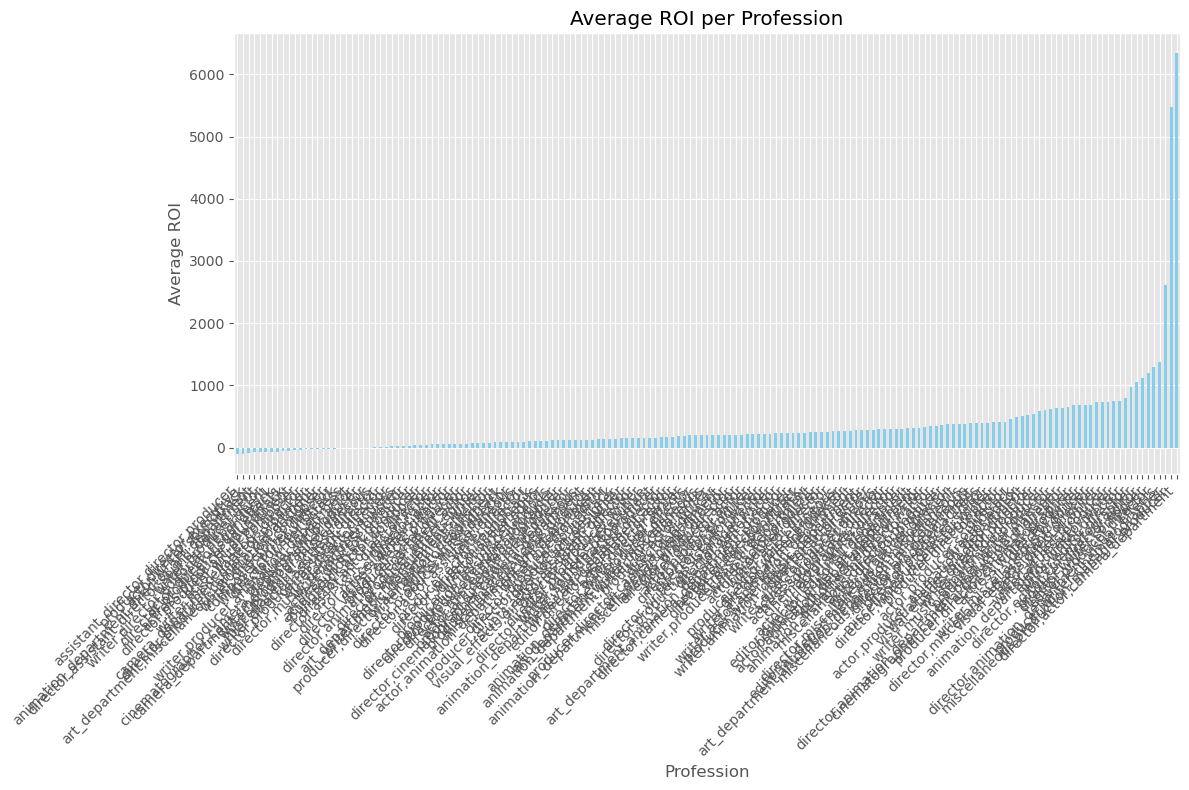

In [105]:
# Calculate average ROI per profession
avg_roi_per_profession = merged_final_df.groupby('primary_profession')['roi'].mean().sort_values()

# Create a bar plot for average ROI per profession
plt.figure(figsize=(12, 8))
avg_roi_per_profession.plot(kind='bar', color='skyblue')
plt.xlabel('Profession')
plt.ylabel('Average ROI')
plt.title('Average ROI per Profession')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


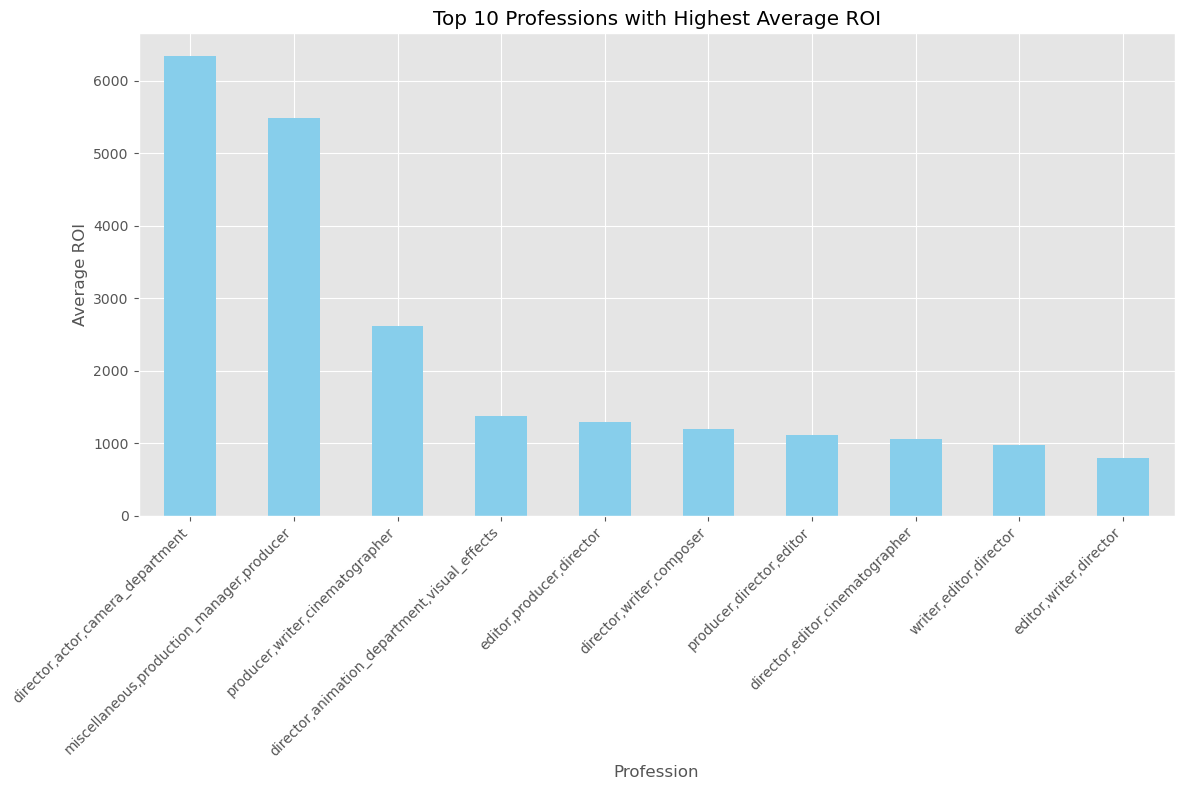

In [106]:
# Calculate average ROI per profession
avg_roi_per_profession = merged_final_df.groupby('primary_profession')['roi'].mean().sort_values(ascending=False)

# Select top 10 professions with highest average ROI
top_10_avg_roi = avg_roi_per_profession.head(10)

# Create a bar plot for top 10 average ROI per profession
plt.figure(figsize=(12, 8))
top_10_avg_roi.plot(kind='bar', color='skyblue')
plt.xlabel('Profession')
plt.ylabel('Average ROI')
plt.title('Top 10 Professions with Highest Average ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [107]:
# Dictionary to store top 3 individuals for each profession within each budget category
top_individuals_by_budget_profession = {}

for budget_category in ['Lower Budget', 'Middle Budget', 'Higher Budget']:
    top_individuals_by_budget_profession[budget_category] = {}
    
    # Filter data for the specific budget category
    budget_category_data = merged_final_df[merged_final_df['budget_category'] == budget_category]
    
    # Find the top 3 professions with the highest average ROI for this budget category
    top_3_professions = budget_category_data.groupby('primary_profession')['roi'].mean().nlargest(3).index.tolist()

    for profession in top_3_professions:
        # Filter data for the specific profession
        filtered_data = budget_category_data[budget_category_data['primary_profession'] == profession]
        
        # Filter individuals who are alive
        alive_individuals = filtered_data[(filtered_data['birth_year'].notnull()) & (filtered_data['death_year'].isnull())]
        
        # Find the top 3 individuals with the highest ROI for the profession within the budget category
        top_individuals = alive_individuals.nlargest(3, 'roi')[['primary_name', 'roi']]
        
        # Check for duplicate names and include the next best individual
        unique_individuals = top_individuals.drop_duplicates(subset=['primary_name'], keep='first')
        if len(unique_individuals) < 3:
            additional_individuals = alive_individuals[~alive_individuals['primary_name'].isin(unique_individuals['primary_name'])]
            additional_individuals = additional_individuals.nlargest(3 - len(unique_individuals), 'roi')[['primary_name', 'roi']]
            unique_individuals = pd.concat([unique_individuals, additional_individuals])
            unique_individuals = unique_individuals.drop_duplicates(subset=['primary_name'], keep='first')
        
        # Store the top individuals in a dictionary
        top_individuals_by_budget_profession[budget_category][profession] = unique_individuals.to_dict(orient='records')

# Display the results
for budget_category, professions in top_individuals_by_budget_profession.items():
    print(f"Top  individuals in top performing professions for {budget_category}:")
    for profession, individuals in professions.items():
        print(f"\nProfession: {profession}")
        print("Top Individuals:")
        for ind in individuals:
            print(f"Name: {ind['primary_name']}, ROI: {ind['roi']}")
        print("=" * 50)


Top  individuals in top performing professions for Lower Budget:

Profession: director,actor,camera_department
Top Individuals:
Name: Levan Gabriadze, ROI: 6336.419800000001

Profession: miscellaneous,production_manager,producer
Top Individuals:
Name: Jamie Buckner, ROI: 5479.29612

Profession: producer,writer,cinematographer
Top Individuals:
Name: Tom Boyle, ROI: 2617.9241142857145
Top  individuals in top performing professions for Middle Budget:

Profession: director,producer,actress
Top Individuals:
Name: Sam Taylor-Johnson, ROI: 1327.4952524999999

Profession: writer,music_department,producer
Top Individuals:
Name: Seth MacFarlane, ROI: 1012.0332539999999

Profession: actor,producer,animation_department
Top Individuals:
Name: Conrad Vernon, ROI: 643.9171315789474
Top  individuals in top performing professions for Higher Budget:

Profession: director,animation_department,visual_effects
Top Individuals:
Name: Kyle Balda, ROI: 1468.0218554054054

Profession: animation_department,direc

## Recommendations

### Budget Bracket Recommendations:

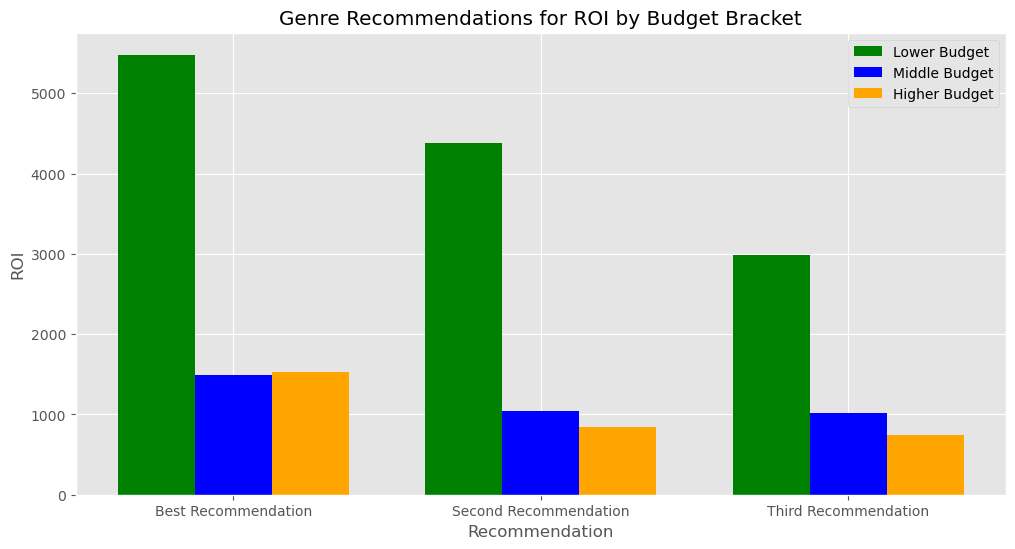

In [120]:
genres = ['Best Recommendation', 'Second Recommendation', 'Third Recommendation']
roi_values_lower = [5479.296120, 4384.589026, 2987.584937]
roi_values_middle = [1490.000705, 1043.769440, 1012.033254]
roi_values_higher = [1527.246076, 843.666159, 748.313273]

width = 0.25
x = range(len(genres))

plt.figure(figsize=(12, 6))
plt.bar([i - width for i in x], roi_values_lower, width=width, label='Lower Budget', color='green')
plt.bar(x, roi_values_middle, width=width, label='Middle Budget', color='blue')
plt.bar([i + width for i in x], roi_values_higher, width=width, label='Higher Budget', color='orange')

plt.title('Genre Recommendations for ROI by Budget Bracket')
plt.xlabel('Recommendation')
plt.ylabel('ROI')
plt.xticks(x, genres)
plt.legend()
plt.show()

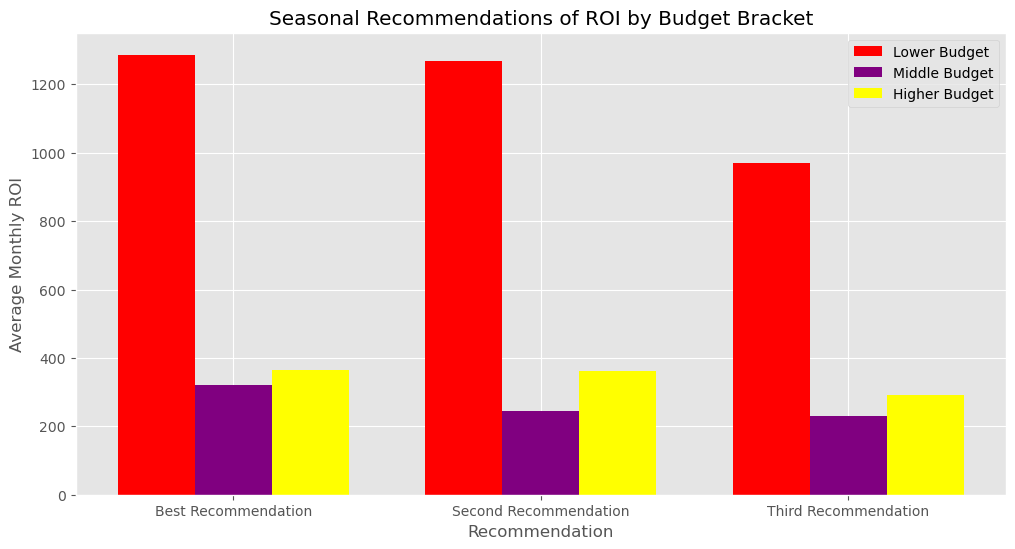

In [115]:
months = ['Best Recommendation', 'Second Recommendation', 'Third Recommendation']
roi_values_lower = [1286.732885, 1268.604293, 968.837083]
roi_values_middle = [322.130888, 244.326009, 231.572260]
roi_values_higher = [365.744233, 361.425554, 292.476411]

width = 0.25
x = range(len(months))

plt.figure(figsize=(12, 6))
plt.bar([i - width for i in x], roi_values_lower, width=width, label='Lower Budget', color='red')
plt.bar(x, roi_values_middle, width=width, label='Middle Budget', color='purple')
plt.bar([i + width for i in x], roi_values_higher, width=width, label='Higher Budget', color='yellow')

plt.title('Seasonal Recommendations of ROI by Budget Bracket')
plt.xlabel('Recommendation')
plt.ylabel('Average Monthly ROI')
plt.xticks(x, months)
plt.legend()
plt.show()

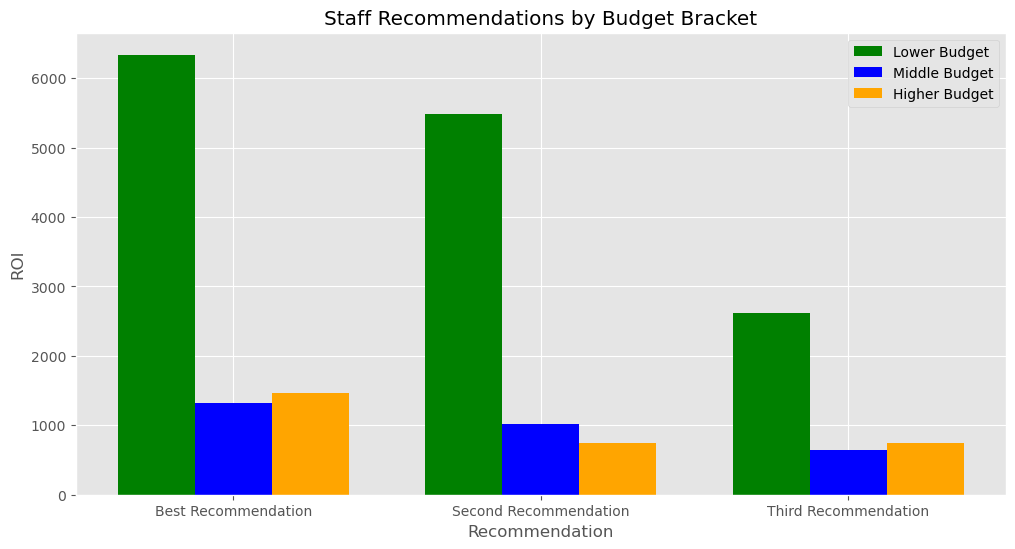

In [116]:
staff_positions = ['Best Recommendation', 'Second Recommendation', 'Third Recommendation']
staff_roi_values_lower = [6336.419800000001, 5479.29612, 2617.9241142857145]
staff_roi_values_middle = [1327.4952524999999, 1012.0332539999999, 643.9171315789474]
staff_roi_values_higher = [1468.0218554054054, 748.3132733333333, 748.3132733333333]

width = 0.25
x = range(len(staff_positions))

plt.figure(figsize=(12, 6))
plt.bar([i - width for i in x], staff_roi_values_lower, width=width, label='Lower Budget', color='green')
plt.bar(x, staff_roi_values_middle, width=width, label='Middle Budget', color='blue')
plt.bar([i + width for i in x], staff_roi_values_higher, width=width, label='Higher Budget', color='orange')

plt.title('Staff Recommendations by Budget Bracket')
plt.xlabel('Recommendation')
plt.ylabel('ROI')
plt.xticks(x, staff_positions)
plt.legend()
plt.show()

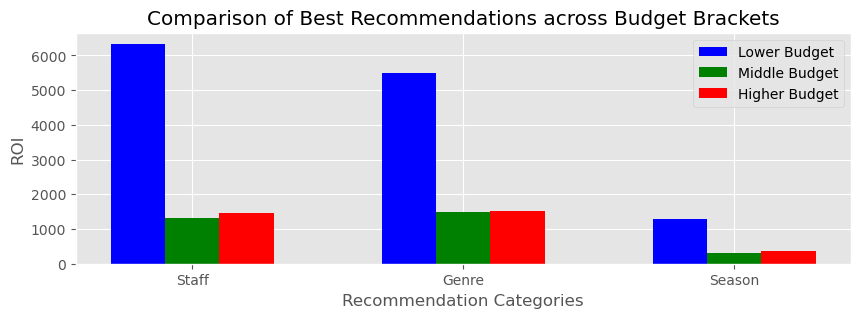

In [126]:
# Data
categories = ['Staff', 'Genre', 'Season']
roi_values_lower = [6336.419800000001, 5479.29612, 1286.732885]
roi_values_middle = [1327.4952524999999, 1490.000705, 322.130888]
roi_values_higher = [1468.0218554054054, 1527.246076, 365.744233]

# Bar width
bar_width = 0.2
bar_positions_lower = np.arange(len(categories))
bar_positions_middle = bar_positions_lower + bar_width
bar_positions_higher = bar_positions_lower + 2 * bar_width

# Plotting
fig, ax = plt.subplots(figsize=(10, 3))

# Plotting bars
ax.bar(bar_positions_lower, roi_values_lower, color='blue', width=bar_width, label='Lower Budget')
ax.bar(bar_positions_middle, roi_values_middle, color='green', width=bar_width, label='Middle Budget')
ax.bar(bar_positions_higher, roi_values_higher, color='red', width=bar_width, label='Higher Budget')

# Adjusting plot appearance
ax.set_xticks(bar_positions_middle)
ax.set_xticklabels(categories)
ax.set_xlabel('Recommendation Categories')
ax.set_ylabel('ROI')
ax.set_title('Comparison of Best Recommendations across Budget Brackets')
ax.legend()

# Display the plot
plt.show()

The analysis underscores a noteworthy finding: <b>consistently higher Return on Investment (ROI) is associated with lower budget films</b>. This unexpected trend suggests that strategically focusing on less expensive productions may offer a more favorable ROI. The visualizations visually reinforce this key insight, providing a compelling case for optimizing film production strategies by targeting the lower budget category.

#### Lower Budget, Production Budget Range: 1 Million to 15 Million US$

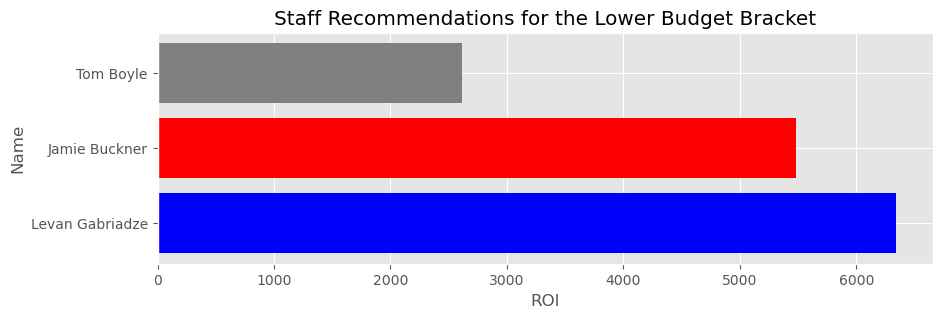

In [125]:
names = ['Levan Gabriadze', 'Jamie Buckner', 'Tom Boyle']
roi_values = [6336.419800000001, 5479.29612, 2617.9241142857145]

plt.figure(figsize=(10, 3))
plt.barh(names, roi_values, color=['blue', 'red', 'gray'])
plt.title('Staff Recommendations for the Lower Budget Bracket')
plt.xlabel('ROI')
plt.ylabel('Name')
plt.show()

Here are our three recommendations by the criteria of Genre, Season (month) of release, and Staff.

| Genre Recommendations | Genre |
| --- | --- |
| Best Recommendation | Comedy, Romance, Sport |
| Second Recommendation | Drama, Fantasy |
| Third Recommendation | Horror |

| Seasonal Recommendations | Month |
| --- | --- |
| Best Recommendation | February |
| Second Recommendation | August |
| Third Recommendation | May |

| Staff Recommendations | Name |
| --- | --- |
| Director, Actor, Camera Department | Levan Gabriadze |
| Miscellaneous, Production Manager, Producer | Jamie Buckner |
| Producer, Writer, Cinematographer | Tom Boyle |

#### Middle Budget, Production Budget Range: 15 Million to 50 Million US$

Here are our three recommendations by the criteria of Genre, Season (month) of release, and Staff.

| Genre Recommendations | Genre |
| --- | --- |
| Best Recommendation | Horror, Mystery, Thriller |
| Second Recommendation | Action, Sci-Fi, Thriller |
| Third Recommendation | Comedy, Fantasy |

| Seasonal Recommendations | Month |
| --- | --- |
| Best Recommendation | July |
| Second Recommendation | November |
| Third Recommendation | January |

| Staff Recommendations | Name |
| --- | --- |
| Director, Producer, Actress | Sam Taylor-Johnson |
| Writer, Music Department, Producer | Seth MacFarlane |
| Actor, Producer, Animation Department | Conrad Vernon |

#### Higher Budget, Production Budget Range: Above 50 Million US$

| Genre Recommendations | Genre |
| --- | --- |
| Best Recommendation | Biography, Drama, Music |
| Second Recommendation | Action, Biography, Drama |
| Third Recommendation | Adventure, Drama, Sport |

| Seasonal Recommendations | Month |
| --- | --- |
| Best Recommendation | April |
| Second Recommendation | June |
| Third Recommendation | July |

| Staff Recommendations | Name |
| --- | --- |
| Director, Animation Department, Visual Effects | Kyle Balda |
| Animation Department, Director, Writer | Chris Buck |
| Writer, Miscellaneous, Producer | Jennifer Lee, Jared Bush |

# Conclusions

Our analysis reveals promising trends across various budget brackets in the film industry. By exploring genre preferences, release timings, and key professionals, the data provides actionable insights. Notably, our findings indicate a consistent and higher Return on Investment (ROI) associated with lower budget films, suggesting an opportunity for stakeholders to strategically invest in this bracket. <br><br>These insights serve as a valuable starting point for informed investment and production decisions, offering a pathway to optimize film production strategies based on the identified trends in each budget category.

## Limitations

Our analysis is confined to the provided dataset and lacks consideration of additional factors that might impact future performance. Limited to data up until 2018, potential emerging trends within the past six years remain unexplored. The analysis presents a high-level overview, and a more granular breakdown may enhance accuracy. Furthermore, we haven't adjusted the financial data for present-day inflation rates, which could influence the final outcomes of our calculations.

## Next Steps

Future steps for this project involve in-depth exploration of the US and Foreign film markets to better understand their influence on the industry. Acquiring data from the last six years will complement our existing dataset, enabling a comprehensive analysis of recent trends. Additionally, delving deeper into the original, albeit incomplete, datasets may provide valuable insights that were lost during the merging process. These efforts aim to enhance the completeness and relevance of our research, paving the way for a more robust and insightful analysis.